<h1><center><font size="6">Statistics - Bayesian and Frequentist inference using Python</font></center></h1>
Acknowledgement: This work is motivated by the tutorial - Bayesian Data Science by Simulation, by Eric Ma, Hugo Bowne-Anderson in <a href="https://www.scipy2020.scipy.org/tutorial-information">SciPy 2020</a> and their <a href='https://github.com/ericmjl/bayesian-stats-modelling-tutorial/blob/master/notebooks/01a-instructor-probability-simulation.ipynb'>github post</a>. I tried to put a little bit of my thoughts on top of their discussion. I also heavily followed Bayesian Regression from <a href="">Max Halford</a> and the github post of this <a href="https://github.com/zjost/bayesian-linear-regression">link</a>.
<h2><a id='0'>Table of Contents</a></h2>

1. <a href='#start'>Three Paths to Learn Machine Learning</a> 

1. <a href='#1'>Modern Definition of Bayes' Theorem (Measure Theoretic)</a>  
    - <a href='#11'>What is probability?</a> 
    - <a href='#12'>$\sigma$-Algebra</a> 
    - <a href='#13'>Measurable Space and Measurable function</a> 
    - <a href='#14'>Measure</a> 
    - <a href='#15'>Measure space</a> 
    - <a href='#16'>Probability space and Probability (Probability axioms of Kolmogorov - 1931)</a> 
    - <a href='#17'>Conditional probability</a> 
    - <a href='#18'>Random Variable</a> 
    - <a href='#19'>Borel $\sigma$-Algebra $\mathcal{B}(X)$</a> 
    - <a href='#110'>Borel $\sigma$-Algebra $\mathcal{B}(\mathbb{R})$</a> 
    - <a href='#111'>Discrete and Continuous Random Variable</a> 
    - <a href='#112'>Bayes' Theorem</a> 
    - <a href='#113'>Stochastic or random process</a> 
    - <a href='#114'>Random field</a> 
    - <a href='#115'>Discrete-time and continuous-time stochastic processes</a> 
3. <a href = "#3">What is the difference between probability and likelihood?</a>
2. <a href='#4'>Bayesian and Frequentist Fundamentals</a>
    - <a href='#41'>History of Bayesian Statistics</a>
    - <a href='#42'>Bayesian and Frequentist Inference</a>
2. <a href='#2'>Different Probability Distributions</a>  
    - <a href='#21'>Discrete Statistical Distributions</a> 
    - <a href='#22'>Continuous Statistical Distributions</a>  
2. <a href='#5'>Bayesian and Frequentist Machine Learning</a>
    - <a href='#51'>Multiple Linear Regression</a>
        - <a href='#511'>Frequentist</a>
        - <a href='#512'>Bayesian</a>

# <a id='start'>Three Paths to Learn Machine Learning</a> 

## Path 1 (Bad path)

2. Learn Machine Learning and Deep Learning models only
1. Learn how to use TensorFlow | Keras | Scikit-learn
2. Start using them on the data.

**Approximate Learning Time:** 6 months to 1 year.

## Path 2 (Good path)

1. Learn Linear Algebra, Calculus (differential and integral) and Statistics
2. Learn Machine Learning and Deep Learning
1. Learn how to use TensorFlow | Keras | Scikit-learn
2. Start using them on the data.

**Approximate Learning Time:** 2 years.

## Path 3 (Worst path)

1. Learn pure and abstract math (e.g. Topology, Abstract Algebra, Differential Geometry, Algebraic Geometry)
2. Learn applied maths (e.g. Real analysis, Measure theory, Functional analysis, Topological Degree theory, Partial and Ordinary differential equations, Numerical analysis, Complex Analysis, Optimization)
2. Learn advanced computer science (e.g. Graph theory and combinatorics, Topological data analysis, Advanced algorithms)
5. Learn classical Statistics and probability theory
5. Learn Bayesian Statistics and Bayesian inference theory
5. Learn Machine Learning and Deep Learning technologies
1. Learn how to use TensorFlow | Keras | Scikit-learn
2. Start using them on the data.

**Approximate Learning Time:** 10 years.

Unfortunately, I have mistakenly followed Path 3 and started applying the knowledge on data after the age of 30 :(


# <a id='1'>Modern Definition of Bayes' Theorem (Measure Theoretic)</a>

### <a id='11'>What is probability?</a>
#### Answer:

$$
\texttt{Probability of an event happening} = \frac{\texttt{Number of ways it can happen}}{\texttt{Total number of outcomes}}
$$
#### Example: the chances of rolling a $4$ with a die
**Number of ways it can happen:** 1 (there is only 1 face with a $4$ on it)

**Total number of outcomes:** 6 (there are 6 faces altogether)
$$
\texttt{So the probability} = \frac{1}{6}
$$

**BUT** Did you just consider that all the faces are `equally likely` for the die? In that case what do you mean by `equally likely`? Do you mean, the `probability` of getting any face is same? If you do not consider that all the faces are `equally likely`, you consider there is a better chance to get a $5$. Are you still saying that the `probability` of getting a $5$ is more? Are you using the word `probability` to define `probability` itself?
#### <center><font color='red'>DEFINITION IS CIRCULAR, RIGHT?<font><center>
    
### How to define probability without using a circular logic? 
#### Answer: Using measure theory.
    
Let us dive into measure theory. First I will state some definitions which is daunting I agree. But this is the only known way to deal with this problem.

### <a id='12'>$\sigma$-Algebra</a>

Let $ X $ be some set, and let $\mathcal{P}(X)$ represent its power set. Then a subset $\Sigma\subseteq\mathcal{P}(X)$ is called a $ \sigma $-algebra if it satisfies the following three properties:
1. $X$ is in $ \Sigma $.
2. $ \Sigma $ is closed under complementation.
3. $ \Sigma $ is closed under countable unions (also closed under countable intersections by applying De Morgan's laws).

### <a id='13'>Measurable Space and Measurable function</a>

    
Consider a set $X$ and a $ \sigma $-algebra $\Sigma$ on $ X $. Then the tuple $(X,\Sigma)$ is called a measurable space.	
	

Let $(X,\Sigma_X )$ and $(Y,\Sigma_Y )$ be measurable spaces. A function $ f:X\to Y $ is said to be measurable if for every $ E\in \Sigma_Y $ the pre-image of $E$ under $ f $ is in $ \Sigma_X $.
	
### <a id='14'>Measure</a>

Let $ X $ be a set and $ \Sigma $ a $ \sigma $-algebra over $ X $. A function $ \mu : \Sigma \to \overline{\mathbb{R}}$ (where $\mathbb{R}$ is extended real line) is called a measure on $(X,\Sigma)$ if it satisfies the following properties:
1. **Non-negativity:** For all $ E $ in $ \Sigma $, we have$  \mu(E) \geq 0$.
2. **Null empty set:** $\mu (\phi )=0$.
3. **Countable additivity (or $\sigma$-additivity):** For all countable collections $\{E_{i}\}_{i=1}^{\infty }$ of pairwise disjoint sets in $ \Sigma $,

$$
\mu \left(\bigcup _{k=1}^{\infty }E_{k}\right)=\sum _{k=1}^{\infty }\mu (E_{k})
$$

### <a id='15'>Measure space</a>

A measure space is a triple $(X,\Sigma,\mu )$ where,
1. $ X $ is a set.
2. $\mathcal {A}$ is a $\sigma$-algebra on the set $X$.
3. $ \mu $  is a measure on $(X,\Sigma )$.
	
### <a id='16'>Probability space and Probability (Probability axioms of Kolmogorov - 1931)</a>

A probability space is a measure space such that the measure of the whole space is equal to one. 
    
The expanded definition is the following: 
    
A probability space is a triple $(\Omega ,{\mathcal {F}},P)$ consisting of:
1. The sample space $\Omega$  - an arbitrary non-empty set (a set of possible outcomes).
2. The $\sigma$-algebra $\mathcal {F}\subseteq 2^{\Omega }$ (also called $\sigma$-field) on $\Omega$, called events.
3. The probability measure $P:{\mathcal {F}}\to [0,1]$ - a function on $\mathcal {F}$ such that the measure of entire sample space is equal to one: $P(\Omega )=1$.
    
Even more elaborate definition is the following:
    
a probability space is a triple $(\Omega ,{\mathcal {F}},P)$ (Measure space) consisting of: 
1. the sample space $\Omega$  — an arbitrary non-empty set,
2. the $\sigma$-algebra $\mathcal {F}\subseteq 2^{\Omega }$ (also called $\sigma$-field) — a set of subsets of $\Omega$, called events, such that:
    - $\mathcal {F}$ contains the sample space: $\Omega \in {\mathcal {F}}$,
    - $\mathcal {F}$ is closed under complements: $A\in\mathcal{F}\Rightarrow(\Omega \setminus A)\in {\mathcal {F}}$,
    - $\mathcal {F}$ is closed under countable unions: $\forall i\in\mathbb{N}, \ A_{i}\in {\mathcal {F}} \Rightarrow \left(\bigcup _{i=1}^{\infty }A_{i}\right)\in {\mathcal {F}}$.
    
    The corollary from the previous two properties and De Morgan’s law says that $\mathcal {F}$ is also closed under countable intersections: $\forall i\in\mathbb{N}, \ A_{i}\in {\mathcal {F}} \Rightarrow \left(\bigcap _{i=1}^{\infty }A_{i}\right)\in {\mathcal {F}}$.

3. the probability measure $P:{\mathcal {F}}\to [0,1]$ — a function on $\mathcal {F}$ such that:
$P$ is countably additive (also called $\sigma$-additive): if $\{A_{i}\}_{i=1}^{\infty }\subseteq {\mathcal {F}}$ is a countable collection of pairwise disjoint sets, then $P\left(\bigcup _{i=1}^{\infty }A_{i}\right)=\sum _{i=1}^{\infty }P(A_{i})$. This `probability measure` is sometimes referred as `probability`,
4. the measure of entire sample space is equal to one: $P(\Omega )=1$.
    

### <a id='17'>Conditional probability</a>
    
The conditional probability based on the intersection of events defined as:

$$\mu (B\mid A) := {\frac {\mu (A\cap B)}{\mu (A)}}.$$
satisfies the probability measure requirements so long as $\mu (A)\neq 0.$
    
    

	
### <a id='18'>Random Variable</a>

Let $(\Omega ,{\mathcal {F}},P)$ be a probability space and $(E,{\mathcal {E}})$ a measurable space. An $(E,{\mathcal {E}})$-valued random variable is a measurable function $X\colon \Omega \to E$, which means that, for every subset $B\in {\mathcal {E}}$, its preimage $X^{-1}(B)\in {\mathcal {F}}$ where $X^{-1}(B)=\{\omega :X(\omega )\in B\}$. This definition enables us to measure any subset $B\in {\mathcal {E}}$ in the target space by looking at its preimage, which by assumption is measurable.

### <a id='19'>Borel $\sigma$-Algebra $\mathcal{B}(X)$</a>
    
The Borel $\sigma$-Algebra on some topological space $\left(X,\tau_X\right)$ is defined to be the $\sigma$-Algebra generated by the open sets (or equivalently, by the closed sets), i.e. the elements of $\tau_X$. In other words, The Borel $\sigma$-Algebra on some topological space $\left(X,\tau_X\right)$ is $\sigma(\tau_X)$. A Borel set is an element of a Borel $\sigma$-Algebra.

It is extremely hard to work with abstract Borel $\sigma$-Algebra on abstract topological space $\left(X,\tau_X\right)$. We should rather confine our interest in $1$-dimensional Eucledian space $\mathbb{R}$ and make some ad-hoc practical use out of it.

### <a id='110'>Borel $\sigma$-Algebra $\mathcal{B}(\mathbb{R})$</a>
The Borel $\sigma$-Algebra on $\left(\mathbb{R},\tau_{\mathbb{R}}\right)$ is $\sigma(\tau_{\mathbb{R}})$ where $\tau_{\mathbb{R}}$ is standard topology on $\mathbb{R}$.
    
    
### <a id='111'>Discrete and Continuous Random Variable</a>
Let $(\Omega ,{\mathcal {F}},P)$ be a probability space and $(\mathbb{R},\mathcal{B}(\mathbb{R}))$ be the measurable space. Let $X$ be $(\mathbb{R},\mathcal{B}(\mathbb{R}))$-valued random variable $X\colon \Omega \to \mathbb{R}$, which means that, for every subset $B\in \mathcal{B}(\mathbb{R})$, its preimage $X^{-1}(B)\in {\mathcal {F}}$ where $X^{-1}(B)=\{\omega :X(\omega )\in B\}$. 
    
If a random variable $X\colon \Omega \to \mathbb {R}$  defined on the probability space $(\Omega ,{\mathcal {F}},\operatorname {P} )$ is given, we can ask questions like $$\texttt{What is the probability to have an $X\in\mathcal {F}$ which is mapped to $B\in \mathcal{B}(\mathbb{R})$ ?}$$ 


    
This is the same as the probability of the event $\{\omega :X(\omega )=B\}$ which is often written as $P(X=B)$ or $p_{X}(B)$ for short. Thus in general, 
\begin{equation}
    P(X=B) = p_X(B)=\texttt{probability of the event $\{\omega :X(\omega )=B\}$}\\
    p_X(B)=P\left(\{\omega :X(\omega )=B\}\right)\in[0,1]
\end{equation}
    
$p_X$ is called the `distribution` of the random variable $X$. If $p_X$ gives measure one to a countable set of reals, then $X$ is called a `discrete random variable`. If $p_X$ gives zero measure to every singleton set, and hence to every countable set, $X$ is called a `continuous random variable`.
    
    
### <a id='112'>Bayes' Theorem</a>
Let $(\Omega ,{\mathcal {F}},P)$ be a probability space where ${\mathcal {F}}$ is the event space where $\{B_1, B_2, \ldots\}$ be a partition of ${\mathcal {F}}$. Then, for any $B_i$ in the partition:
$$
P \left({B_i \mid A}\right) = \dfrac {P\left({A \mid B_i}\right) P\left(B_i\right) } {P\left(A\right)} = \dfrac {P\left({A \mid B_i}\right) P\left(B_i\right)} {\sum_j P\left({A \mid B_j}\right) P\left(B_j\right) }
$$
Using the chain rule,
$$
P(A\cap B\cap C)=P(A\mid B\cap C)\,P(B\mid C)\,P(C)
$$
and
$$
P(B\cap A\cap C)=P(B\mid A\cap C)\,P(A\mid C)\,P(C)
$$
we get the following version of Bayes' Theorem
$$
P(A\mid B\cap C)={\frac {P(B\mid A\cap C)\,P(A\mid C)}{P(B\mid C)}}
$$
	
### <a id='113'>Stochastic or random process</a>

A stochastic or random process can be defined as a collection of random variables that is indexed by some mathematical set, meaning that each random variable of the stochastic process is uniquely associated with an element in the set. A stochastic process can be denoted, among other ways, by $\{X(t)\}_{t\in T},\ \{X_{t}\}_{t\in T},\ \{X_{t}\},\ \{X(t)\}$ or simply as $X(t)$, although $X(t)$ is regarded as an abuse of function notation.
	
In other words, a stochastic process is defined as a collection of random variables defined on a common probability space $(\Omega ,{\mathcal {F}},P)$, where $\Omega$  is a sample space, $\mathcal {F}$ is a $\sigma$ -algebra, and $P$ is a probability measure; and the random variables, indexed by some set $T$, all take values in the same mathematical space $S$, which must be measurable with respect to some $\sigma$ -algebra $\Sigma$.
    
    
    
The standard way to define stochastic processes is as follows:
    
Let $(\Omega ,{\mathcal {F}},P)$ be an abstract probability space.
Let $(E,{\mathcal {E}})$ be d a measurable space, which in almost all cases will be a `Polish space` (separable completely metrizable topological space) together with its Borel $\sigma$-Algebra. The space $E$ is called the `state space`; it can be $n$-dimensional Euclidean space or more abstract spaces such as Banach spaces. 
Let $\mathcal{I}$ be an indexing set. 
Then a stochastic process with state space $E$ and index set $I$ is a collection of $(E,{\mathcal {E}})$-valued
random variables, $${X_t,t \in I}\ \text{defined on}\ (\Omega ,{\mathcal {F}},P).$$
The values of a stochastic process are not always numbers and can be vectors or other mathematical objects.
	
	
### <a id='114'>Random field</a>

Given a probability space $(\Omega ,{\mathcal {F}},P)$ and measurable space $(E,{\mathcal {E}})$, an $(E,{\mathcal {E}})$-valued random field is a collection of $(E,{\mathcal {E}})$-valued random variables indexed by elements in a topological space $\tau$. That is, a random field $F$ is a collection

$$\{ F_t : t \in \tau \}$$
where each $F_t$ is an $(E,{\mathcal {E}})$-valued random variable.
	
	
### <a id='115'>Discrete-time and continuous-time stochastic processes</a>

When interpreted as time, if the index set of a stochastic process has a finite or countable number of elements, such as a finite set of numbers, the set of integers, or the natural numbers, then the stochastic process is said to be in discrete time. If the index set is some interval of the real line, then time is said to be continuous. These two types of stochastic processes are respectively referred to as discrete-time and continuous-time stochastic processes.

# <a id = 3>What is the difference between probability and likelihood?</a>
</br><center>Following is the picture of the big guy
<h4>Sir Ronald Aylmer Fisher</h4>
<img src="https://upload.wikimedia.org/wikipedia/commons/a/aa/Youngronaldfisher2.JPG" width=300 height=200 />
</center>

**Statistical inference** is the process of using data analysis to infer properties of an underlying distribution of probability.

**Probability** is about the frequencies of observations given the model. This problem is not so difficult.

**Inverse Probability** is about obtaining statistical inference about the underlying model given the observations. This is a difficult problem.

**Some important historical remarks:** [<a href="https://stats.stackexchange.com/questions/492966/what-exactly-does-the-term-inverse-probability-mean">Click for Reference</a>] In his 1921 work <a href="https://royalsocietypublishing.org/doi/10.1098/rsta.1922.0009">On the mathematical foundations of theoretical statistics</a>, <a href="https://en.wikipedia.org/wiki/Ronald_Fisher">Ronald A. Fisher</a> mentions the method of the maximum likelihood in relation to 'inverse probability'. But he argues that we should not view this 'inverse probability' as a 'probability' and suggests instead the term `likelihood`.

**Example:** Consider the following two types of questions:

- (Probability) I have a fair six-sided die; what is the probability that I roll a 6 six times in a row?
- (Inverse Probability) I roll a 6 six times in a row with a six-sided die; do I have a fair die?

You can see a wonderful explanation by <a href="https://www.quora.com/profile/Dima-Korolev">Dima Korolev</a> on <a href="https://www.quora.com/What-is-the-difference-between-probability-and-likelihood-1">quora</a>. Here is my a bit technical explanation with Binomial distribution .

**What is the probability of getting $x$ heads if we toss a coin $n$ times. Given probability of getting a head is $p$.**
The probability follows a Binomial distribution with respect to $x$.

$$P(x) ={\binom {n}{x}}p^{x}(1-p)^{n-x}$$
$$\sum_k P(x) =\sum_x  {\binom {n}{x}}p^{x}(1-p)^{n-x} = 1$$

Area under any of the following curve is $1$.
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/75/Binomial_distribution_pmf.svg/1280px-Binomial_distribution_pmf.svg.png" width=500 height=500 />

**Find the best possible the probability $p$ for getting a head if you see that out of $n$ trials there are $x$ heads for an experiment?**

Our best guess would be $r = \frac{x}{n}$. But that may not be quite true. Because, the experiemnt itself may be erroneous or somewhat accidental. In an ideal condition number of heads might be something else other than $x$. This is where the Bayesians and Frequentists differ. Frequentists require an ideal experimental setup as they will decide $\frac{x}{n}$ as the final probability for the model. 

As an example, if we ask what is the probability that Joe Biden will win the election, frequentists will say that their is no meaning of asking this question as there is no experiemnts done. But Bayesians will still try to attack the problem based on some prior belief and any available data without actually observing Joe Biden winning and loosing any election.

Thus from a Bayesian perspective, we cannot deny if two other person gives us two other values $r_1$ and $r_2$ for the probability $p$, such that $$r_1<r=\frac{x}{n}<r_2$$
Now question is `which one is the best?` To know this we use our knowledge that if we have known $p$ beforehand the probability of getting $x$ heads would have been
$${\binom {n}{x}}p^{x}(1-p)^{n-x}$$
But in our case, we do not know $p$. Our best guess would be $r = \frac{x}{n}$ as we have obseved this from one experiemnt. Thus we will say that the probability of getting $x$ heads out of $n$ trials is,
$${\binom {n}{x}}r^{x}(1-r)^{n-x}$$
But still the question remains why not $r_1$ or $r_2$. The answer is we will accept the model that maximizes our `likelihood` of getting the observations we have in hand. Because, the incident of $x$ heads out of $n$ trials has already occured. So, for us it should have a very high probability, as high as we can get. So, we will end up doing the following maximization problem,
$$r_0 = \arg\max_r{\binom {n}{x}}r^{x}(1-r)^{n-x}$$
This is our best approximation of $p$. So, we claim that the underlying Binomial distribution,
$${\binom {n}{x}}{r_0}^{x}(1-{r_0})^{n-x}$$
Let us do some experiemnt to get $r_0$ for some examples.

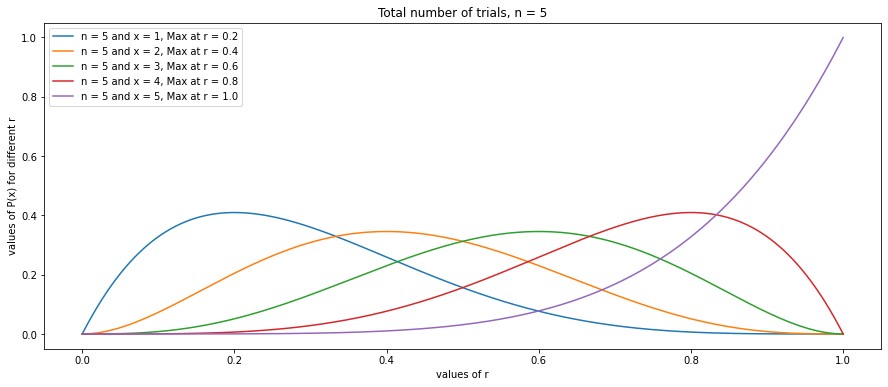

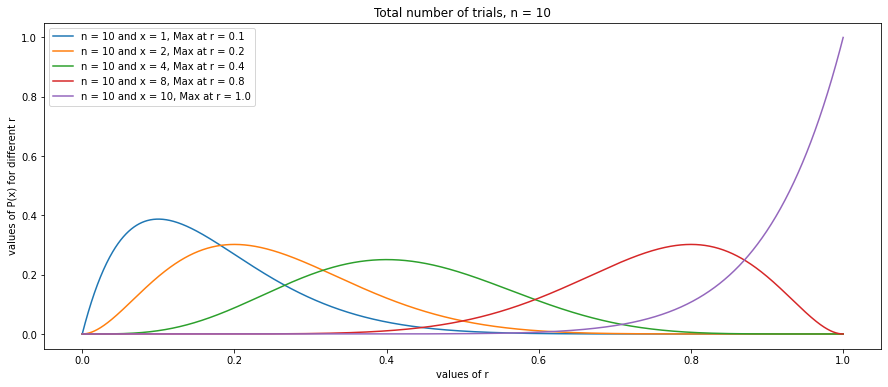

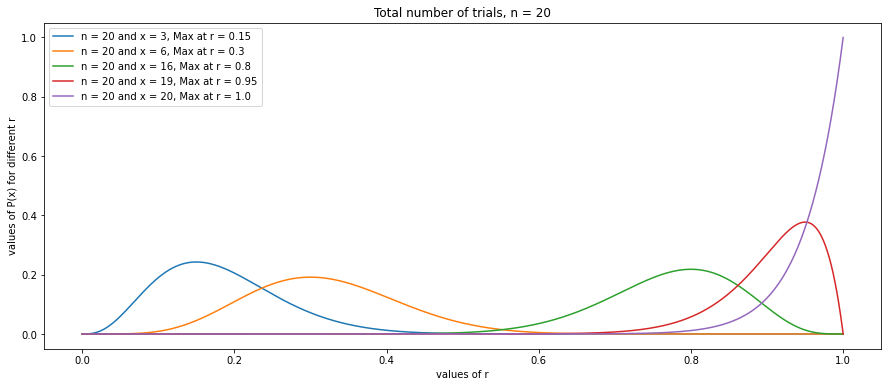

In [1]:
from math import comb, gcd
import matplotlib.pyplot as plt
import random

num_trials_list = [5, 10, 20]
lcm = num_trials_list[0]
for i in num_trials_list[1:]:
    lcm = lcm*i//gcd(lcm, i)
howManyGuesses = lcm*100
r_list = [x / howManyGuesses for x in list(range(0,howManyGuesses+1))]
plt.rcParams["figure.figsize"] = (15,6)
for n in num_trials_list:
    #sample_size = n # to see all
    sample_size = min(num_trials_list)
    sampled_n = [range(1,n+1)[i] for i in sorted(random.sample(range(len(range(1,n+1))), sample_size))]
    for x in sampled_n:
        p_x = []
        for r in r_list:
            p_x.append(comb(n,x)*(r**x)*((1-r)**(n-x)))
        maxIndex = p_x.index(max(p_x))
        plt.plot(r_list, p_x, label = f'n = {n} and x = {x}, Max at r = {r_list[maxIndex]}')
    plt.xlabel('values of r')
    plt.ylabel('values of P(x) for different r')
    plt.title(f'Total number of trials, n = {n}')
    plt.legend()
    plt.show()

This experiment supports that the best possible value of $r_0$ is actually $r_0 = \frac{x}{n}$. But how do you prove it analytically?

\begin{equation}
\ln\left({}^nC_x~p^x(1-p)^{n-x}\right) = \ln({}^nC_x)+x\ln(p)+(n-x)\ln(1-p)\\
\implies\ \frac{d}{dp}\ln({}^nC_x)+x\ln(p)+(n-x)\ln(1-p) = \frac{x}{p}- \frac{n-x}{1-p} = 0\\
\implies\ \frac{n}{x} = \frac{1}{p}\\
\implies\ p = \frac{x}{n}
\end{equation}

But what about,
$$\sum_x  {\binom {n}{x}}{r_0}^{x}(1-{r_0})^{n-x} = 1 ?$$
Are you sure unless you catch the exact value of $p$ it will be $1$? Almost certainly it will be something else for optimum $r$. 



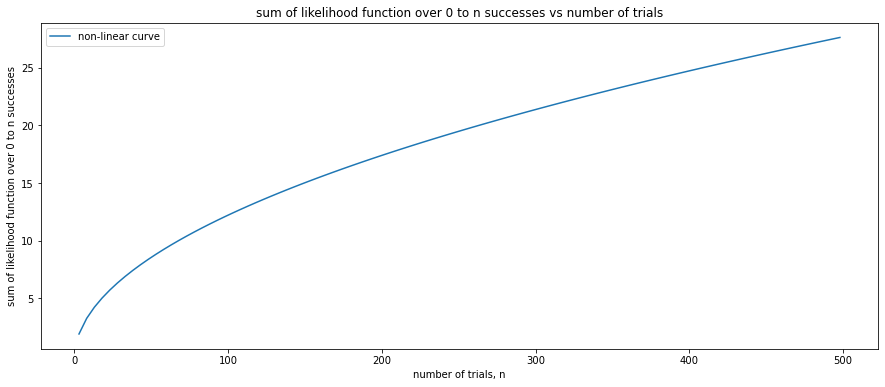

In [2]:
start_n = 3
end_n = 500
tot_prob = []
list_n = range(start_n, end_n+1, 5)
for n in list_n:
    list_x = list(range(n+1))
    p_x = [0] + [comb(n,x)*((x/n)**x)*((1-x/n)**(n-x)) for x in list_x[1:-1]] + [1]
    tot_prob.append(sum(p_x))
plt.rcParams["figure.figsize"] = (15,6)
plt.plot(list_n, tot_prob, label = f'non-linear curve')
plt.xlabel('number of trials, n')
plt.ylabel('sum of likelihood function over 0 to n successes')
plt.title(f'sum of likelihood function over 0 to n successes vs number of trials')
plt.legend()
plt.show()

Thus we cannot say that likelihood is a valid probability distribution. Yet, some values of $p$ (e.g. $\frac{x}{n}$) are now more `likely` than the others (e.g. $r_1$, $r_2$). For instance,  $r = \frac{x}{n}$  is now the most likely value for  $p$. This appearance of the word `likely` is where the idea of `likelihood` is drawn from.

Below is some more intuitive explanation for why we maximize the likelihood function.

The intuition behind maximizing a likelihood function is that it maximizes the likelihood that observed sample data came from true population. As we maximize this likelihood, parameters estimated using sampled data approach closest to the unknown population parameters.

On the other hand, minimizing sum of squared errors minimizes error between the observed sample and true population data. As we minimize this error, parameters estimated using sampled data approach closest to the unknown population parameters. <a src="https://www.quora.com/Why-must-we-maximize-the-likelihood-function-Why-do-we-not-minimize-it-like-the-sum-of-a-square-error-What-is-the-fundamental-reason-behind-maximizing-the-likelihood-function">Click here</a> for more detail.

<h3><font color="green">By now we should be clear about the ideas of probability and likelihood.</h3>
Let us proceed to the next conception of probability. This will incorporate the philosophical arguments about probabilistic thinking.

# <a id='4'>Bayesian and Frequentist Fundamentals</a>

**Very important history:** [<a href="https://en.wikipedia.org/wiki/Bayesian_statistics">Click for Reference</a>] Bayesian statistics was named after Thomas Bayes, who formulated a specific case of Bayes' theorem in **1763**. In several papers spanning from the late **18th to the early 19th centuries**, Pierre-Simon Laplace developed the Bayesian interpretation of probability. Laplace used methods that would now be considered Bayesian to solve a number of statistical problems. During much of the **20th century**, Bayesian methods were viewed unfavorably by many statisticians due to philosophical and practical considerations. Many Bayesian methods required much computation to complete, and most methods that were widely used during the century were based on the frequentist interpretation. However, with the advent of powerful computers and new algorithms like Markov chain Monte Carlo, Bayesian methods have seen increasing use within statistics in the **21st century**.

## <a id='41'>History of Bayesian Statistics</a>

As discussed earlier, Inverse Probability is about obtaining statistical inference about the underlying model given the observations. 
### Inverse probability
[<a href="https://projecteuclid.org/download/pdf_1/euclid.ba/1340371071">Click for Reference</a>] Let us focus is on the emergence of the adjective `Bayesian` as associated with inferential methods in the middle of the twentieth century to describe what has been referred to up to that point as the method of `inverse probability`. Neither Bayes (**1763**) nor Laplace (**1774**) did use the term inverse probability; the phrase came into use later. For example, De Morgan (**1837**) wrote about the method of inverse probability and attributed its general form to Laplace's 1812 book - `inverse` because it involves inferring backwards from the data to the parameter or from effects to causes. The term continued in use until the mid-twentieth century. It was only later that others (Howie (**2002**) et al.) argued that Laplace had not noticed that inverting the conditioning changed the meaning of probability. 

### Rise of Likelihood
[<a href="https://projecteuclid.org/download/pdf_1/euclid.ba/1340371071">Click for Reference</a>] Over a period of 10 years from **1912 to 1922**, `Ronald Aylmer Fisher` moved away from the inverse methods and towards his own approach to inference he called the `likelihood`, a concept he claimed was distinct from probability. But Fisher's progression in this regard was slow. Stigler (**2004**) in his paper `How Ronald Fisher Became a Mathematical Statistician` has pointed out that, in an unpublished manuscript dating from **1916**, Fisher didn't distinguish between likelihood and inverse probability with a flat prior. But within six years Fisher's thinking had a broad new perspective, and his **1922** paper was to revolutionize modern statistical thinking. In it, he not only introduced likelihood and its role in producing maximum likelihood estimates, but he also gave us the statistical notions of `sufficiency` and `efficiency` and used the label `parameter`, which was to become the object of scientific inquiry. Fisher's work had a profound in influence on two other young statisticians Jerzy Neyman and Egon Pearson. They found Fisher's ideas on significance tests lacking in mathematical detail and, together, they set out to extend and complete what he had done. In the process, they developed the methods of hypothesis testing and confidence intervals that were to revolutionize both the theory and the application of statistics. As a result of some works of Fisher, Neyman and Pearson `frequentist` methods superseded inverse probability and had a great impact of these frequentist methods especially in psychology. The work of Richard von Mises (**1928**) on frequentist approach was also a justifications for probability, but his work had remarkably little in influence on the course of the development of statistical methods and theory despite its seeming importance to philosophers. While there were statistical activities during **World War II** in other countries, none appear to have influenced the development of Bayesian methods in a fashion comparable to those that occurred in Great Britain and the United States. I.J. Good, who was Turing's statistical assistant at Bletchley Park during WWII, has described Turing's statistical contributions during this period, which were primarily Bayesian. Turing invented a Bayesian approach to sequential data analysis, using weights of evidence (though not under that name). It was not until the **1960s** that these ideas entered the mainstream of Bayesian and frequentist thinking. In his **1958** paper, Good wrote the following: 
> By a neo-Bayesian or neo/Bayes-Laplace philosophy we mean one that makes use of inverse probabilities, with or without utilities, but without necessarily using Bayes' postulate of equiprobable or uniform initial distributions, and with explicit emphasis on the use of probability judgments in the form of inequalities.

Thus it seems apt to describe the **1950s** as the era of the neo-Bayesian revival. The introduction of `Monte Carlo Markov chain` methods to the Bayesian world in the late **1980s** made possible computations that others had only dreamed of two decades earlier, when the work on the Federalist papers or election predictions was viewed as a Herculean feat. Bayesian methods have spread rapidly into areas of application and have been championed by practicing scientists, e.g., in computer science and machine learning. Moreover, the unity of statistics has become a theme of many papers, beginning as early as George Barnard's 1971 presidential address to the Royal Statistical Society and continuing to the present day with Bradley Efron's **2004** presidential address to the American Statistical Association

The advent of powerful computers also made it possible for Bayesian statistics as a regular analytical methods in modern days.

## <a id='42'>Bayesian and Frequentist Inference</a>

[<a href="https://www.probabilisticworld.com/what-is-probability/">Click for Reference</a>] Let us consider the following question,
> how do probabilities, as a mathematical concept, relate to the physical world?

Let us consider the following 4 definitions of probabilities which answer the last question. 
- **Classical Definition:** According to this early definition, you first need to conceptually break down the `possibility space` (which is another name for the sample space) into `equally likely` and `mutually exclusive` outcomes. Then, the probability of an event is defined as the `number of outcomes` favorable to the event, divided by the `total number of possible outcomes`. This breaks down if we ask  - what is the probability that Joe Biden will win the election?
- **Long-term frequencies:** Probability of an event is equal to the long-term frequency of the event’s occurrence when the same process is repeated many times. Again if we ask what is the probability that a marrige will sustain given the detail of the bride and groom.
- **Degrees of belief:** Probabilities can be beliefs about the occurrence of an event, the truth of a hypothesis, or the truth of any random fact. In other words, probabilities represent how certain you are about the truth of statements. These statements can refer to the past, the present, or the future. Probabilities should reflect your knowledge and experience. The principle of indifference is also used here to assign probabilities to events when you know nothing about them or when you have no reason to believe any event is more likely than the others.
- **Degrees of logical support:** This definition is actually very similar to the previous one. The main difference is that, instead of degrees of belief, here you talk about the degree of logical support for a particular hypothesis. In this view, probabilities are a generalization of classical logic. With this definition, you still update probabilities with Bayes’ theorem. The difference is that you are more constrained in your initial assignment of priors. You can’t appeal to vague things like your gut feeling. However, there’s still some disagreement among theoreticians on this point.

Frequentist inference is based on the first two definitions, whereas Bayesian inference is rooted in definitions 3 and 4.

In short, according to the frequentist definition of probability, only repeatable random events (like the result of flipping a coin) have probabilities. These probabilities are equal to the long-term frequency of occurrence of the events in question. In contrast, Bayesians view probabilities as a more general concept. As a Bayesian, you can use probabilities to represent the uncertainty in any event or hypothesis. Here, it’s perfectly acceptable to assign probabilities to non-repeatable events, such as Hillary Clinton winning the US presidential race in 2016. Orthodox frequentists would claim that such probabilities don’t make sense because the event is not repeatable. That is, you can’t run the election cycle an infinite number of times and calculate the proportion of them that Hillary Clinton won.

# <a id='2'>Different Probability Distributions</a>  

We must have the knowledge of different probability distributions in order to continue studying Bayesian learning. Let us see all the available probability distributions in `scipy.stats`

## <a id='21'>Discrete Statistical Distributions</a>  
**Probability Mass Function:** The probability mass function, $P(X=x)=f(x)$, of a discrete random variable $X$ is a function that satisfies the following properties:
1. $P(X=x)=f(x)>0$, if $x\in S$. Where $S$ is the set of all possible values of the random variable $X$.
2. $\sum\limits_{x\in S} f(x)=1$.
3. $P(X\in A)=\sum\limits_{x\in A} f(x)$, where $A$ is an event.

Following are the probability mass functions available in `scipy.stats`

- Bernoulli Distribution
- Beta-Binomial Distribution
- Binomial Distribution
- Boltzmann (truncated Planck) Distribution
- Planck (discrete exponential) Distribution
- Poisson Distribution
- Geometric Distribution
- Negative Binomial Distribution
- Hypergeometric Distribution
- Negative Hypergeometric Distribution
- Zipf (Zeta) Distribution
- Logarithmic (Log-Series, Series) Distribution
- Discrete Uniform (randint) Distribution
- Discrete Laplacian Distribution
- Yule-Simon Distribution

## <a id='22'>Continuous Statistical Distributions</a>  
**Probability Density Function:** The probability density function ("p.d.f.") of a continuous random variable $X$ with support $S$ is an integrable function  satisfying the following:
1.  $f(x)$ is positive everywhere in the support $S$, that is, $f(x)>0$, for all $x$ in $S$
2. The area under the curve $f(x)$ in the support $S$ is 1, that is,
$$\int_S f(x)dx=1$$
3. If $f(x)$ is the p.d.f. of $x$, then the probability that $x$ belongs to $A$, where $A$ is some interval, is given by the integral of $f(x)$ over that interval, that is:
$$P(X \in A)=\int_A f(x)dx$$

Following are the probability density functions available in `scipy.stats`

- Alpha Distribution
- Anglit Distribution
- Arcsine Distribution
- Beta Distribution
- Beta Prime Distribution
- Bradford Distribution
- Burr Distribution
- Burr12 Distribution
- Cauchy Distribution
- Chi Distribution
- Chi-squared Distribution
- Cosine Distribution
- Double Gamma Distribution
- Double Weibull Distribution
- Erlang Distribution
- Exponential Distribution
- Exponentiated Weibull Distribution
- Exponential Power Distribution
- Fatigue Life (Birnbaum-Saunders) Distribution
- Fisk (Log Logistic) Distribution
- Folded Cauchy Distribution
- Folded Normal Distribution
- Fratio (or F) Distribution
- Gamma Distribution
- Generalized Logistic Distribution
- Generalized Pareto Distribution
- Generalized Exponential Distribution
- Generalized Extreme Value Distribution
- Generalized Gamma Distribution
- Generalized Half-Logistic Distribution
- Generalized Inverse Gaussian Distribution
- Generalized Normal Distribution
- Gilbrat Distribution
- Gompertz (Truncated Gumbel) Distribution
- Gumbel (LogWeibull, Fisher-Tippetts, Type I Extreme Value) Distribution
- Gumbel Left-skewed (for minimum order statistic) Distribution
- HalfCauchy Distribution
- HalfNormal Distribution
- Half-Logistic Distribution
- Hyperbolic Secant Distribution
- Gauss Hypergeometric Distribution
- Inverted Gamma Distribution
- Inverse Normal (Inverse Gaussian) Distribution
- Inverted Weibull Distribution
- Johnson SB Distribution
- Johnson SU Distribution
- KSone Distribution
- KStwo Distribution
- KStwobign Distribution
- Laplace (Double Exponential, Bilateral Exponential) Distribution
- Asymmetric Laplace Distribution
- Left-skewed Lévy Distribution
- Lévy Distribution
- Logistic (Sech-squared) Distribution
- Log Double Exponential (Log-Laplace) Distribution
- Log Gamma Distribution
- Log Normal (Cobb-Douglass) Distribution
- Log-Uniform Distribution
- Maxwell Distribution
- Mielke’s Beta-Kappa Distribution
- Nakagami Distribution
- Noncentral chi-squared Distribution
- Noncentral F Distribution
- Noncentral t Distribution
- Normal Distribution
- Normal Inverse Gaussian Distribution
- Pareto Distribution
- Pareto Second Kind (Lomax) Distribution
- Power Log Normal Distribution
- Power Normal Distribution
- Power-function Distribution
- R-distribution Distribution
- Rayleigh Distribution
- Rice Distribution
- Reciprocal Inverse Gaussian Distribution
- Semicircular Distribution
- Student t Distribution
- Trapezoidal Distribution
- Triangular Distribution
- Truncated Exponential Distribution
- Truncated Normal Distribution
- Tukey-Lambda Distribution
- Uniform Distribution
- Von Mises Distribution
- Wald Distribution
- Weibull Maximum Extreme Value Distribution
- Weibull Minimum Extreme Value Distribution
- Wrapped Cauchy Distribution

# <a id='5'>Bayesian and Frequentist Machine Learning</a>
In this section we will deal with some machine learning techniques and hands on experience for both frequentist and Bayesian perspective.

## <a id='51'>Multiple Linear Regression</a>

### <a id='511'>Frequentist</a>
Let the data set is given as $\{y_{i},\,x_{i1},\ldots ,x_{ip}\}_{i=1}^{n}$ of $n$ statistical units and  the model takes the form,
$$y_{i}=\beta _{0}+\beta _{1}x_{i1}+\cdots +\beta _{p}x_{ip}+\varepsilon _{i}=\mathbf {x} _{i}^{\mathsf {T}}{\boldsymbol {\beta }}+\varepsilon _{i},\qquad i=1,\ldots ,n,$$

Often these n equations are stacked together and written in matrix notation as

$$\mathbf {y} =X{\boldsymbol {\beta }}+{\boldsymbol {\varepsilon }}$$
where
$$\mathbf {y} ={\begin{pmatrix}y_{1}\\y_{2}\\\vdots \\y_{n}\end{pmatrix}},\ \ X={\begin{pmatrix}\mathbf {x} _{1}^{\mathsf {T}}\\\mathbf {x} _{2}^{\mathsf {T}}\\\vdots \\\mathbf {x} _{n}^{\mathsf {T}}\end{pmatrix}}={\begin{pmatrix}1&x_{11}&\cdots &x_{1p}\\1&x_{21}&\cdots &x_{2p}\\\vdots &\vdots &\ddots &\vdots \\1&x_{n1}&\cdots &x_{np}\end{pmatrix}},\ \ {\boldsymbol {\beta }}={\begin{pmatrix}\beta _{0}\\\beta _{1}\\\beta _{2}\\\vdots \\\beta _{p}\end{pmatrix}},\quad {\boldsymbol {\varepsilon }}={\begin{pmatrix}\varepsilon _{1}\\\varepsilon _{2}\\\vdots \\\varepsilon _{n}\end{pmatrix}}.$$
The job of linear regression is to find out an estimation of $\boldsymbol {\beta }$ such that $\boldsymbol {\varepsilon }^T\boldsymbol {\varepsilon }$ is minimum. Notice,
\begin{equation}
{\boldsymbol {\varepsilon }} = \mathbf {y} -X{\boldsymbol {\beta }}\\
\implies X^T{\boldsymbol {\varepsilon }} = X^T\mathbf {y} -X^TX{\boldsymbol {\beta }}
\end{equation}
Now, if $\mathbf {y}$ is in the column space of $X$ then there exists a $\boldsymbol {\beta }$ for which $\boldsymbol {\varepsilon }=0$. But this is rarely the situation, or this is the situation where we are overfitting or luckily all the data points are on the hyperplane already. In that case, $\boldsymbol {\beta }$ can be directly solved using $n$ equations from $$\mathbf {y} =X{\boldsymbol {\beta }}$$
But if this is not the case, then we want to find out an approximation of $\boldsymbol {\beta }$ such that $\boldsymbol {\varepsilon }^T\boldsymbol {\varepsilon }$ is minimum. Suppose, $\hat {\boldsymbol {\beta }}$ is our estimated vector. Observe, minimizing $\boldsymbol {\varepsilon }^T\boldsymbol {\varepsilon }$ is equivalent to saying $\boldsymbol {\varepsilon }$ is orthogonal to the column space of $X$. Thus for $\hat {\boldsymbol {\beta }}$ we have $X^T{\boldsymbol {\varepsilon }}=0$. Then we get the following relation,
\begin{equation}
0 = X^T\mathbf {y} -X^TX\hat {\boldsymbol {\beta }}
\end{equation}
Now, we assume, $rank(X^TX) = p$. Then we have, $$\hat {\boldsymbol {\beta }}=\left(\mathbf {X} ^{\textsf {T}}\mathbf {X} \right)^{-1}\mathbf {X} ^{\textsf {T}}\mathbf {y} ,$$
so the fitted values are
$${\hat {\mathbf {y} }}=\mathbf {X} {\hat {\boldsymbol {\beta }}}=\mathbf {X} \left(\mathbf {X} ^{\textsf {T}}\mathbf {X} \right)^{-1}\mathbf {X} ^{\textsf {T}}\mathbf {y}.$$
Therefore, the projection matrix (and hat matrix) is given by
$$\mathbf {P} \equiv \mathbf {X} \left(\mathbf {X} ^{\textsf {T}}\mathbf {X} \right)^{-1}\mathbf {X} ^{\textsf {T}}.$$

Also notice,

\begin{equation}
  ESS  =  \sum_{i = 1}^n \left( \hat{Y_i} - \overline{Y} \right)^2,   \\
  TSS  =  \sum_{i = 1}^n \left( Y_i - \overline{Y} \right)^2,   \\
  SSR = \sum_{i=1}^n \hat{u}_i^2\\
  TSS = ESS + SSR\\
  R^2  = \frac{ESS}{TSS}\\
  SER = s_{\hat{u}} = \sqrt{s_{\hat{u}}^2} \ \ \ \text{where} \ \ \ s_{\hat{u} }^2 = \frac{1}{n-2} \sum_{i = 1}^n \hat{u}^2_i = \frac{SSR}{n - 2}
\end{equation}

**Create Dummy Data**

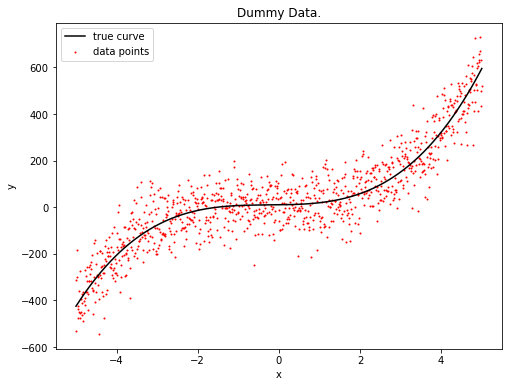

In [3]:
import numpy as np

n = 1000
line_starts_at = -5
line_ends_at = 5
line_coeff = [10, 2, 3, 4]
noise_factor = 0.08

x_data = np.linspace(line_starts_at, line_ends_at, num = n)
basis_vectors = [1, x_data, x_data**2, x_data**3]
true_curve = np.matmul(np.transpose(line_coeff), basis_vectors)

noise = (max(true_curve)-min(true_curve))*noise_factor*np.random.normal(size = n)
y_data = true_curve + noise
plt.rcParams["figure.figsize"] = (8,6)
plt.scatter(x_data, y_data, label = f'data points', s=1, color='red')
plt.plot(x_data, true_curve, label = f'true curve', color='black')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Dummy Data.')
plt.legend()
plt.show()

Fitted curve :: 12.37 + 3.07x + 3.17x^2 + 3.91x^3


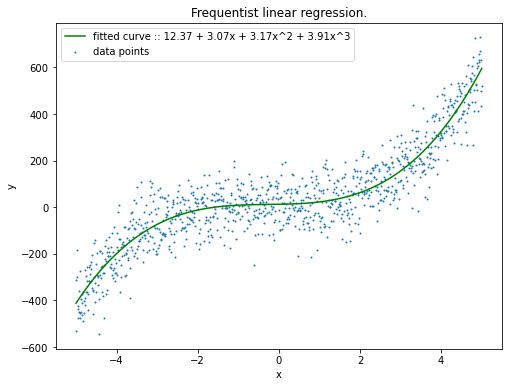

Explained sum of squares (ESS) =  37939020.85802836
Sum of squared residuals (SSR) =  6578405.3927674275
Total sum of squares (TSS) =  44517426.25079581
ESS + SSR =  44517426.25079579
R^2 =  0.8522285328062996


In [4]:
from numpy.linalg import inv
from sklearn.preprocessing import PolynomialFeatures
x = x_data
y = y_data

Xmat = PolynomialFeatures(len(line_coeff)-1).fit_transform(x[:,np.newaxis])
Xmat.shape
XTX = np.matmul(np.transpose(Xmat),Xmat)
beta_temp = np.matmul(inv(XTX),np.transpose(Xmat))
beta_hat = np.matmul(beta_temp,y)
y_hat = np.matmul(np.matmul(Xmat, beta_temp), y)

beta_hat_str = np.around(beta_hat, decimals=2)
equation_str = f'{beta_hat_str[0]} + {beta_hat_str[1]}x'
if(len(beta_hat_str)>2):
    for i in range(2,len(beta_hat_str)):
        equation_str = equation_str + f' + {beta_hat_str[i]}x^{i}'
print(f'Fitted curve :: {equation_str}')
plt.rcParams["figure.figsize"] = (8,6)
plt.plot(x, y_hat, label = f'fitted curve :: {equation_str}', color='green')
plt.scatter(x, y, label = f'data points', s=1)
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Frequentist linear regression.')
plt.legend()
plt.show()
ESS = np.sum((y_hat - np.average(y))**2)
SSR = np.sum((y_hat - y)**2)
TSS = np.sum((y - np.average(y))**2)
R2 = ESS/TSS
SER = np.sqrt(SSR/(n-2))

print('Explained sum of squares (ESS) = ', ESS)
print('Sum of squared residuals (SSR) = ', SSR)
print('Total sum of squares (TSS) = ', TSS)
print('ESS + SSR = ', ESS + SSR)
print('R^2 = ', R2)

**Let us do the same work (Frequentist linear regression) using python library**

Fitted curve :: 12.37 + 3.07x + 3.17x^2 + 3.91x^3


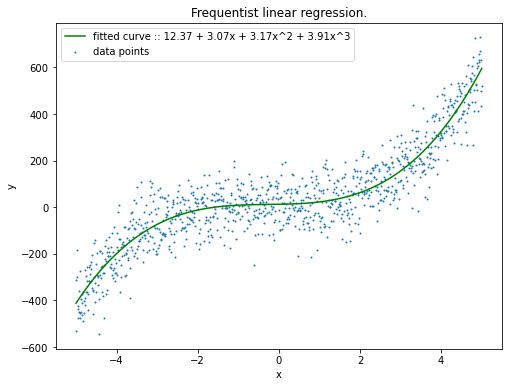

The explained sum of squares. (ess) =  37939020.85802838
Sum of squared (whitened) residuals (ssr) =  6578405.392767427
The total (weighted) sum of squares centered about the mean (centered_tss) =  44517426.25079581
Uncentered sum of squares (uncentered_tss) =  46028153.883140445
R^2 =  0.8522285328063002


In [5]:
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

x = x_data
y = y_data

Xmat = PolynomialFeatures(len(line_coeff)-1).fit_transform(x[:,np.newaxis])

model = sm.OLS(y, Xmat).fit()
ypred = model.predict(Xmat)

params_str = np.around(model.params, decimals=2)
equation_str = f'{params_str[0]} + {params_str[1]}x'
if(len(params_str)>2):
    for i in range(2,len(params_str)):
        equation_str = equation_str + f' + {params_str[i]}x^{i}'
print(f'Fitted curve :: {equation_str}')
plt.rcParams["figure.figsize"] = (8,6)
plt.plot(x, ypred, label = f'fitted curve :: {equation_str}', color='green')
plt.scatter(x, y, label = f'data points', s=1)
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Frequentist linear regression.')
plt.legend()
plt.show()

plt.show()
print('The explained sum of squares. (ess) = ', model.ess)
print('Sum of squared (whitened) residuals (ssr) = ', model.ssr)
print('The total (weighted) sum of squares centered about the mean (centered_tss) = ', model.centered_tss)
print('Uncentered sum of squares (uncentered_tss) = ', model.uncentered_tss)
print('R^2 = ', model.rsquared)

### <a id='512'>Bayesian</a>
#### Bayes Regression Summary
[Acknowledgement: Professor <a href="http://www.lithoguru.com/scientist/about.html">Chris A. Mack</a>]
- Pick a prior distribution
- Calculate the likelihood function in the usual way
- Calculate the posterior distribution, usually numerically (MCMC)
- Summarize the posterior distribution (usually MAP estimate, credible interval)

[<a href="https://maxhalford.github.io/blog/bayesian-linear-regression/">Click for Reference</a>] Suppose you have an infinite stream of feature vectors $x_i$ and targets $y_i$. For supervised learning, then your goal is to estimate $y_i$ before it is revealed. In order to do so, you need a model which is composed of parameters denoted $\theta_i$. In summary, $p(y_i | x_i)$ is called the `predictive distribution` which is our ultimate target. But to get that we have to know the parameters $\theta_i$ given previous data $x_{i-1}, y_{i-1}$ and previous parameter $\theta_{i-1}$. If we do not have any previous parameter, we simply guess a distribution $p(\theta_{i-1})$ of $\theta_{i-1}$ based on our belief any any knowledge about the situation called `prior distribution`. If no data is also available, there is nothing we can do. We will simply say that the distribution of the parameter is $p(\theta_{i-1})$. Which is in other words doing nothing except giving an opinion about an unseen world. 

Anyway, suppose you suddenly observed a data point $x_{i-1}, y_{i-1}$ from the unseen world which you just guessed previously using your intuition. Now, you are very happy that you can update your knowledge about that world using BOTH your prior belief $p(\theta_{i-1})$ and the new data point $x_{i-1}, y_{i-1}$. Notice that your prior knowledge is denoted by $p(\theta_{i-1})$, so your new improved knowledge would be $p(\theta_{i} | \theta_{i-1}, x_{i-1}, y_{i-1})$ which we call `posterior distribution`.

**Question:** Why do we care about our prior belief $p(\theta_{i-1})$ if we have a data point $x_{i-1}, y_{i-1}$. Why should we not just build our whole belief system only using current knowledge.

**Answer:** Amazing question. This question proves that you understand the battle between frequentist and Bayesian argument. Removing your prior belief says that the seen world has the ultimate unchangable truth. The world has an underlying fixed law. The law is governed by some unknown parameters $\{\theta_{i}\}_{i\in{I\subseteq\mathbb{R}}}$. Einstein called those parameters `hidden variables`, which was his famous battle with `Werner Heisenberg` for new science called `Quantum Mechanics` in 1920s. Considering that the parameters were created by God, we do not dare to put error in God's work, which means they are iternal and unchangable, no uncertainty is there. We, mortal human beings are no one to change them or having a prior judgement over God's creation. We should rather wait until we observe God's truth when God will reveal them to us. As a servant of God we should never attempt to guess His mind. We should only be satisfied with what we are given from Heaven and do analysis on top of that. This is exactly what we call the `frequentist` view. So, probability is nothing but the decision of long term observations. Something didn't happen - we do not talk about any probability there. This seems a quite reseanable. Now, think about the question - What is the probability that Donald Trump will win the 2020 election against democrats? There is one sample of him winning against democrats in 2016. So, it must be 100%. But that was not the case, **he lost**. So, the argument didn't work. Because, saying 100% is equivalent to `overfitting` by `maximizing the likelihood`, $p(y_{i-1} | x_{i-1}, \theta_{i-1})$ of the underlying truth (`model parameters`) for the observed data to be true. The dataset is just not big enough to do such `maximization of the likelihood`. How about we have the idea that the world is going to a progressive direction? How about talking about Trump's ignorance to `Black lives matter` protest? How about his ignorance to the `environment`. How about doing some of the aspects of his personality? We can do those. But can we do those mathematically? These are very hard to quantify for calculation. The proposal here is just assigning some prior beliefs before any calculation? We will call it the `prior distribution`, $p(\theta_{i-1})$. Then we will take a data point of Trump winning 2016 election. If we are correct, then we celebrate our correct calculation. If not, not a very big deal, because we can be sure that we are not putting importance only on 2016 election, which is good and more favorable in this small dataset case. We also have to take care of the situation whether Donald Trump will go for the election at all, we call it the `denominator` term $p(x_{i-1}, y_{i-1})$ term. All these information can be combined using `Bayes formula` to obtain the result which is our target for updating our knowledge of the underlying parameter $p(\theta_{i} | \theta_{i-1}, x_{i-1}, y_{i-1})$, we call it the `posterior distribution`. The next step would be using this updated distribution as our next `prior distribution` to calculate the next `posterior distribution`. This is the way Bayesian thinking goes in order to gradually and recursively understand the underlying law of nature with the advent of new data using Bayes formula,
\begin{equation}
p(\theta_{i+1} | \theta_i, x_i, y_i) = \frac{p(y_i | x_i, \theta_i)p(\theta_i)}{p(x_i, y_i)}
\end{equation}
Recursion goes like the following
\begin{equation}
{p(\theta_3 | \theta_2, x_2, y_2)} \propto {p(y_2 | x_2, \theta_2)} \underbrace{{p(y_1 | x_1, \theta_1)} \underbrace{{p(y_0 | x_0, \theta_0)} {p(\theta_0)}}_{{p(\theta_1)}} }_{{p(\theta_2)}}
\end{equation}
Finally, the `predictive distribution`, which is obtained by marginalizing over the model parameters 
\begin{equation}
{p(y_i | x_i)} = \int {p(y_i | \textbf{w}, x_i)} {p(\textbf{w})} d\textbf{w}
\end{equation}

[<a href="https://cosmiccoding.com.au/tutorials/bayes_lin_reg">Click for Reference</a>] 




**Bayesian linear regression**
In a linear regression, the model parameters $\theta_i$ are just weights $w_i$ that are linearly applied to a set of features $x_i$:
$$\begin{equation}
y_i = w_i x_i^\intercal + \epsilon_i
\end{equation}$$
The trick here is that we’re going to assume that the noise $\epsilon_i$ follows a given distribution. In particular, we will use the Gaussian <a href="https://www.wikiwand.com/en/Ansatz">ansatz</a> (`initial placement of a tool at a work piece`). It typically provides an initial estimate or framework to the solution of a mathematical problem, and can also take into consideration the boundary conditions (in fact, an ansatz is sometimes thought of as a "trial answer" and an important technique in solving differential equations). In that case the likelihood function is a Gaussian distribution:
\begin{equation}
p(y_i | x_i, w_i) = \mathcal{N}(w_i x_i^\intercal, \beta^{-1})
\end{equation}

Christopher Bishop calls $\beta$ the `noise precision parameter`. In statistics, the precision is inversely related to the noise variance,
$$\beta = \frac{1}{\sigma^2}$$
The appropriate prior distribution (weight parameters $w_i$ at the beginning $w_0$) for the above likelihood function is the multivariate Gaussian distribution:
\begin{equation}
 p(w_0) = \mathcal{N}(m_0, S_0),\ \ \ m_0 = (0, \dots , 0),\ \ \ S_0 = \begin{pmatrix} \alpha^{-1} & \dots & \dots \\ \dots & \alpha^{-1} & \dots \\ \dots & \dots & \alpha^{-1} \end{pmatrix}
\end{equation}
We can now determine the posterior distribution of the weights:
\begin{equation}
p(w_{i+1} | w_i, x_i, y_i) = \mathcal{N}(m_{i+1}, S_{i+1})
\end{equation}
\begin{equation}
S_{i+1} = (S_i^{-1} + \beta x_i^\intercal x_i)^{-1}
\end{equation}
\begin{equation}
m_{i+1} = S_{i+1}(S_i^{-1} m_i + \beta x_i y_i)
\end{equation}
We can also obtain the predictive distribution:
\begin{equation}
p(y_i) = \mathcal{N}(\mu_i, \sigma_i)
\end{equation}
\begin{equation}
\mu_i = w_i x_i^\intercal
\end{equation}
\begin{equation}
\sigma_i = \frac{1}{\beta} + x_i S_i x_i^\intercal
\end{equation}

I am not going to code this part as there are plenty of coded examples out ther for this process as coding this will not help anymore intuitive understanding.
<h4>NOTE: SOME CODES WERE COPIED FROM THIS <a href="https://github.com/zjost/bayesian-linear-regression">LINK</a>.</h4>
The algorithm has also been discussed in a very nice fashion in that post, I will copy that here with modification for polynomial regression.

### Bayesian Linear Regression Tutorial from <a href="https://github.com/zjost/bayesian-linear-regression">this link</a>. I have modified the code a bit to do the polynomial regression. But moral is same and much of code is taken from there. The following discussion is also copied from the link. This explains in an algorithmic way and elaborates my previous discussion.
This notebook follows the [Bishop](https://www.amazon.com/Pattern-Recognition-Learning-Information-Statistics/dp/0387310738/ref=sr_1_1?ie=UTF8&qid=1474908936&sr=8-1&keywords=pattern+recognition+and+machine+learning) treatment of the Bayesian approach to linear regression.

### The Target
Assume the target $t$ is given by some function of the inputs/parameters plus a noise term.

$$t = f(\vec{x}, \vec{w}) + \epsilon $$

Let's assume the noise is characterized by a normal distribution of mean 0 and precision $\beta$.  Therefore we can say the probability of a value $t$ is given by a normal distribution around the value of the function $f(\vec{x}, \vec{w})$ at that point:

$$p(t \mid \vec{x}, \vec{w}) = Norm(t \mid f(\vec{x}, \vec{w}), \beta^{-1}) \tag{1}$$ 

where $Norm(t \mid \mu, \sigma^2)$ represents a normal distribution of mean $\mu$ and variance $\sigma^2$.

Ultimately, we want to be able to predict $t$ for a new input $\vec{x}$ given some old data $D$ to base that prediction on: 

$$p(t \mid \vec{x}, D)$$

Our Bayesian treatment will allow us to assign this **probability to each value of $t$** for a given $\vec{x}$.  Note that this is more powerful than merely assigning a single-valued estimate of $t$ like traditional Linear Regression, because the probability distribution allows us to assess our *uncertainty in our estimate*, or "model uncertainty".  If we need an estimate for $t$ we can simply choose the maximum of this probability distribution.

### The Model
Let's assume a model for this target that's `linear in the parameters` $\{w_j\}$, but has a general basis representation of the inputs given by $\{\phi_j(\vec{x})\}_{j\in\{1,2,\dots,M-1\}}$.  This results in the following model form:
$$y(\vec{x}, \vec{w}) = w_0 + \sum_{j=1}^{M-1} w_j\phi_j(\vec{x})$$ 
where $M$ is the total number of model parameters.

Note that the basis functions $\phi_j(\vec{x})$ do *not* need to be linear in $\vec{x}$; the linearity required in the assumptions is in reference to the parameters $\{w_j\}_{j\in\{0,1,2,\dots,M-1\}}$.  We could therefore have, e.g. $\phi_n(x) = sin(nx)$.

For convenience, let's define the basis function $\phi_0(\vec{x}) \equiv 1$ so that we can write the model as a vector equation: 

$$y(\vec{x}, \vec{w}) = \vec{w}^T \vec{\phi}(\vec{x})$$

where $\vec{\phi} = (\phi_0, ..., \phi_{M-1})^T$ and $\vec{w} = (w_0, ..., w_{M-1})^T$

Therefore our model of the target $t$ is given by:

$$p(t \mid \vec{x}, \vec{w}) =  Norm(t \mid y(\vec{x}, \vec{w}), \beta^{-1}) = Norm(t \mid \vec{w}^T \vec{\phi}(\vec{x}), \beta^{-1}) \tag{2}$$ 

and we hope, among other things, to find values for $\vec{w}$ that make a good fit to the true model, given by $(1)$.

## Strategy
Recall our true goal is a predictive distribution for $t$ given a new $\vec{x}$ that's based on old data $D$:

$$p(t \mid \vec{x}, D)$$

We can use the marginalization rule $p(x) = \int p(x, y) dy$ to integrate over our parameter values $\vec{w}$:

$$p(t \mid \vec{x}, D) = \int p(t, \vec{w} \mid \vec{x}, D) d\vec{w} $$

An application of the product rule to this integral gives:

$$p(t \mid \vec{x}, D) = \int p(t \mid \vec{x}, \vec{w})p(\vec{w} \mid D) d\vec{w} \tag{3}$$

This result is an integral of two terms:  a) our model given by $(2)$, which uses a particular set of parameter values, and b) a probability for these parameter values.  **In other words, our overall distribution considers every possible parameter value, evaluates a model that has those parameter values and then weights that answer by the probability of us having those parameter values in the first place.**  

Note that this probability distribution of parameters is conditional on the observed data.  We can now use Baye's Theorem to evaluate this conditional probability to take the observational data into account: 

$$p(\vec{w} \mid D) = \frac{p(\vec{w})p(D \mid \vec{w})}{p(D)} = \frac{p(\vec{w})\mathcal{L}(\vec{w} \mid D)}{p(D)}$$  

where $\mathcal{L}(\vec{w} \mid D) = p(D \mid \vec{w})$ is the likelihood of paramters $\vec{w}$ given observational data $D$.  Let's now use vector $\vec{t}$ to represent our data for the target $t$.

The likelihood of a given parameter vector $\vec{w}$ given independent, identically distributed points is calculated by a product of the individual probabilities, which are given by our model in $(2)$:
$$\mathcal{L}(\vec{w} \mid \vec{t}) = p(\vec{t} \mid \vec{X}, \vec{w}) = \prod_{n=1}^{N} p(t \mid \vec{x}_n, \vec{w}) = \prod_{n=1}^{N} Norm(t_n \mid \vec{w}^T \vec{\phi}(\vec{x_n}), \beta^{-1}) \tag{4}$$
where $\vec{t}$ is a vector of $N$ target values, $\vec{X}$ is an $N \times (M-1)$ matrix of feature vectors and $\vec{x_n}$ is the feature vector for the n-th datum.

We will construct a **conjugate prior** such that when we multiply the likelihood by this prior $p(\vec{w})$, we get a function of the same form as the prior.  This will result in **simple update equations** for the parameters of the conjugate prior that convert it into the posterior distribution.  This allows us to sequentially update our estimation as new data comes in.

This strategy has the practical advantage of us not needing to calculate the normalizing denominator of Bayes' Theorem $p(D)$ since our conjugate prior will have a form that's easy to normalize.

## Example Case:  Known Noise Precision
### Theory
First, let's assume we know the precision of the gaussian noise $\beta$ from $(1)$ in advance.  In this case our conjugate prior for the weight parameters turns out to be a simple normal distribution:

$$p(\vec{w}) = Norm(\vec{w} \mid \vec{m}_0, \vec{S}_0) \tag{5}$$

where $\vec{m}_0$ is our prior estimation for the mean value and $\vec{S}_0$ is our prior estimation of the covariance of our distribution.  The conjugate prior is a normal distribution because when you multiply the likelihood by a normal distribution, you can complete the square to get another normal distribution.  The trick is to find how the multiplication of the likelihood changes the parameters of this normal distribution.

Writing it out, the posterior distribution for our weight parameters once we observe the data is then equal to the likelihood $(4)$ multiplied by our prior $(5)$, all adjusted by some normalization constant $Z$:
$$p(\vec{w} \mid \vec{t}, \vec{X}) = \frac{1}{Z} \times p(\vec{t} \mid \vec{X}, \vec{w}) \times p(\vec{w}) = \frac{1}{Z} \prod_{n=1}^{N} Norm(t_n \mid \vec{w}^T \vec{\phi}(\vec{x_n}), \beta^{-1}) \times Norm(\vec{w} \mid \vec{m}_0, \vec{S}_0)$$

The normalization constant can be ignored until the end since the resulting normal distribution can have its normalization constant computed easily.  This results in a normalized form given by:
$$p(\vec{w} \mid \vec{t}) =  Norm(\vec{w} \mid \vec{m}_N, \vec{S}_N) \tag{6.1}$$
where the parameters are updated via these equations:
$$ \vec{S}^{-1}_N = \vec{S}_0^{-1} + \beta\vec{\Phi}^T\vec{\Phi} \tag{6.2}$$
$$ \vec{m}_N = \vec{S}_N(\vec{S}_0^{-1}\vec{m}_0 + \beta\vec{\Phi}^T\vec{t}) \tag{6.3}$$
with 
$$ \vec{\Phi} \equiv   \begin{bmatrix}
    \phi_0(\vec{x}_1)       & \phi_1(\vec{x}_1) & \dots & \phi_{M-1}(\vec{x}_1) \\
    \phi_0(\vec{x}_2)       & \phi_1(\vec{x}_2) & \dots & \phi_{M-1}(\vec{x}_2) \\
    \vdots                  & \vdots            & \ddots & \vdots               \\
    \phi_0(\vec{x}_N)       & \phi_1(\vec{x}_N) & \dots & \phi_{M-1}(\vec{x}_N)
\end{bmatrix}
$$

Note that if data comes in sequentially, the posterior of the previous step becomes the prior of the current step and we only need to calculate the updates to $\vec{m}_N$ and $\vec{S}_N^{-1}$.

### Practice
Let's say the true function (which will be unknown to our analysis) is given by 

$$ f(x, \vec{a}) = a_0 + a_1x + a_2x^2 + a_3x^3 + \epsilon \tag{7.1}$$ 

with noise $\epsilon$ given by

$$\epsilon = Norm(n \mid 0, \beta^{-1}) \tag{7.2}$$

where 
$$a_0 = {10} \\
a_1 = 2 \\
a_2 = 3 \\
a_3 = 4 \\
\beta = \frac{1}{0.2^2}$$

We generate observational data by sampling input $x$ from a uniform distribution $ U(x \mid -1, 1)$, generating noise $\epsilon$ by sampling from $(7.2)$, and then evaluating $(7.1)$ to get our target $t$.  This gives us our dataset $\{\vec{X}, \vec{t}\}$.


For our Bayesian analysis we'll start with a simple prior that has means of zero and assumes the precisions are isotropic and governed by a single precision parameters $\alpha$ (constant for all the weights):
$$ p(\vec{w} \mid \alpha) = Norm(\vec{w} \mid \vec{0}, \alpha^{-1}\vec{I}) \tag{8}$$

Our posterior updates $(6.2, 6.3)$ then evaluate to:
$$ \vec{S}^{-1}_N = \alpha\vec{I} + \beta\vec{\Phi}^T\vec{\Phi} \tag{9.1}$$
$$ \vec{m}_N = \beta\vec{S}_N\vec{\Phi}^T\vec{t} \tag{9.2}$$

Recall that in this case, we're assuming that the noise precision of $\beta$ is known to us.

In sum, we'll be using the data to estimate a probability distribution for the values of $\{w_0, w_1, w_2, w_3\}$, which is the second term under the integral in $(3)$.  If everything is correct, our probability distribution should converge to values very close to $\{a_0, a_1, a_2, a_3\}$ even though our prior is starting out centered at $\{0, 0, 0, 0\}$.  

Once we calculate this probability distribution we can plug it into $(3)$ along with our model and integrate to get our ultimate goal:  an equation that predicts the probability of various values of $t$ for a given $x$ based on historical data.




# Online data as a continuous stream

Initializing Bayesian Regression...


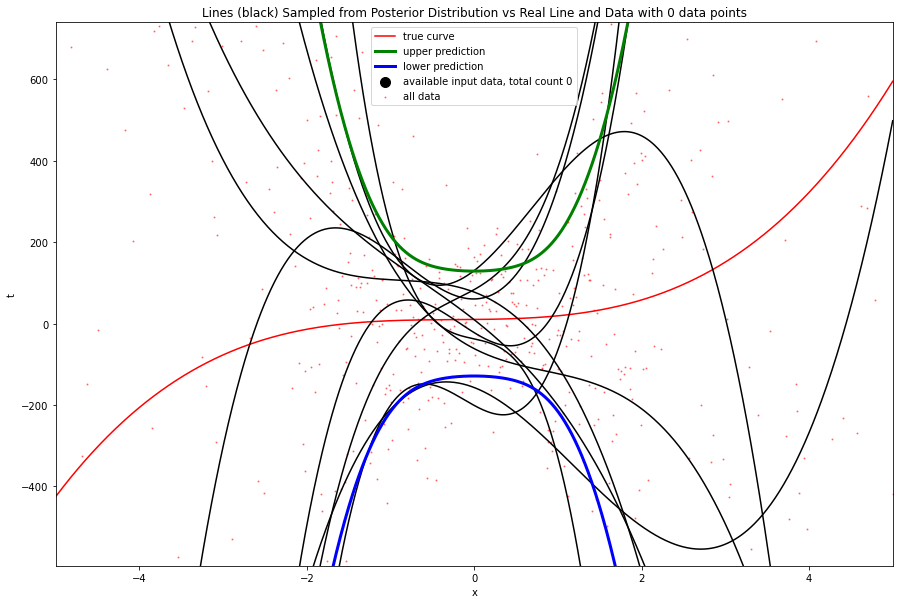

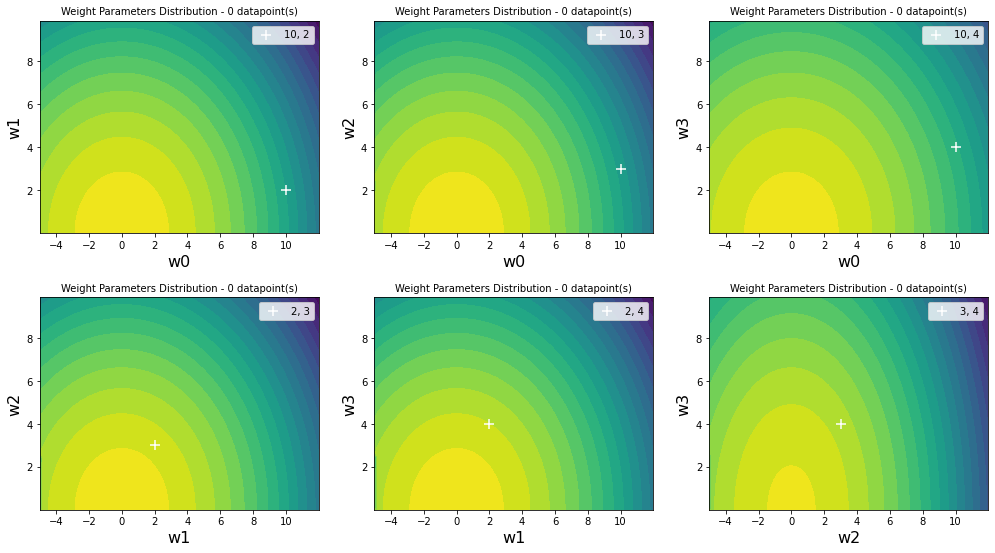

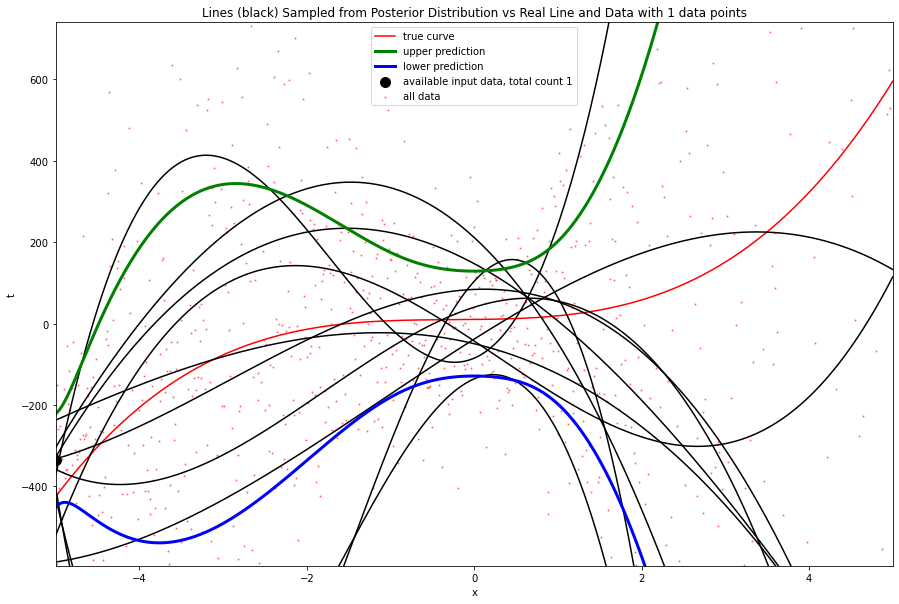

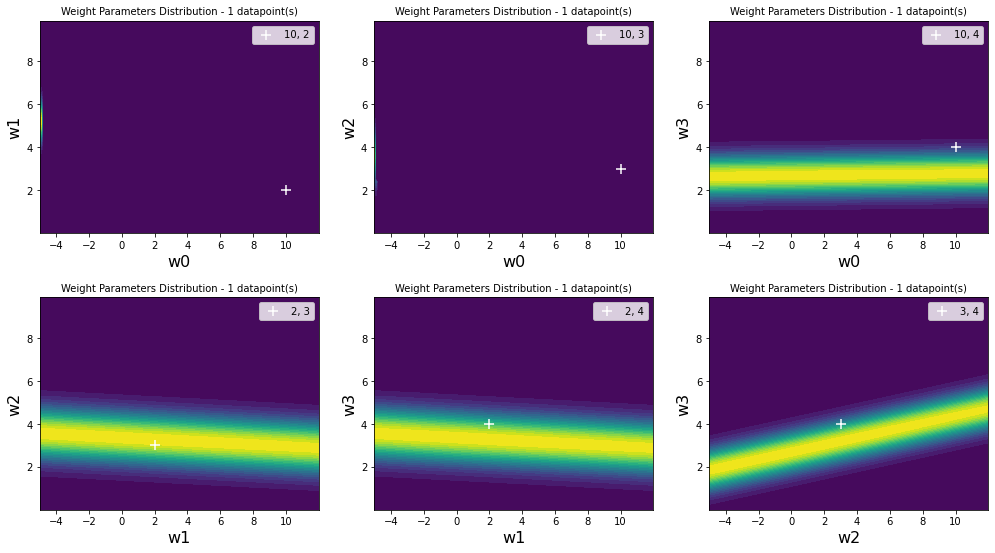

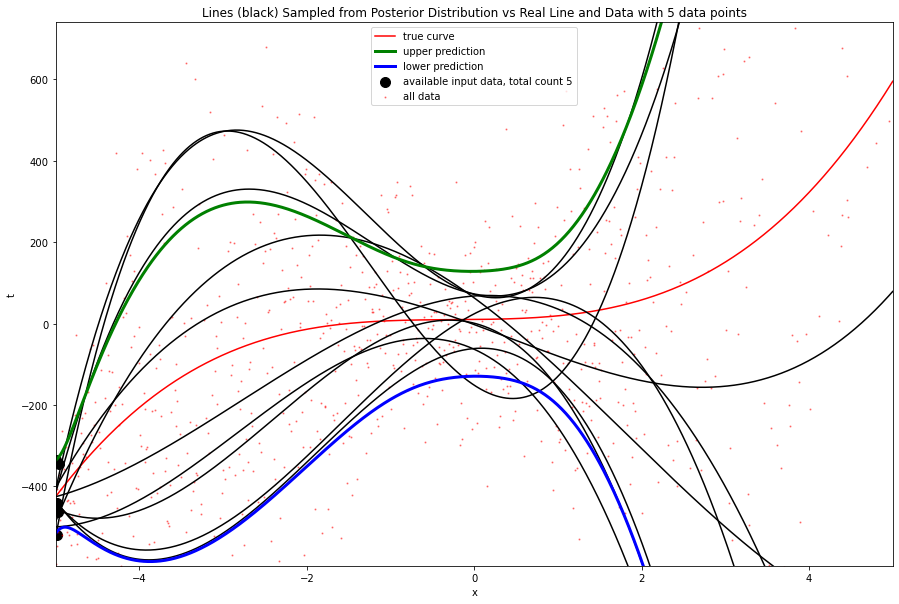

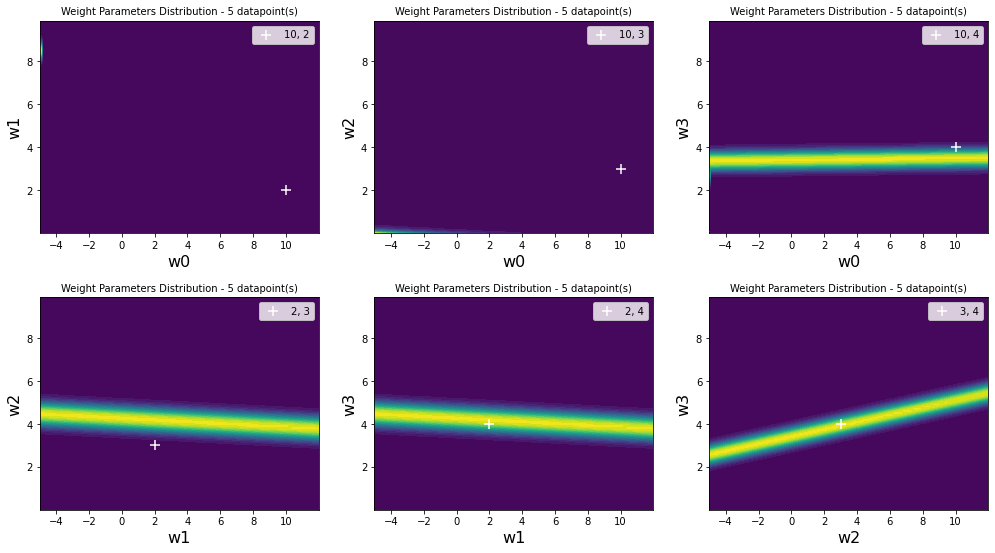

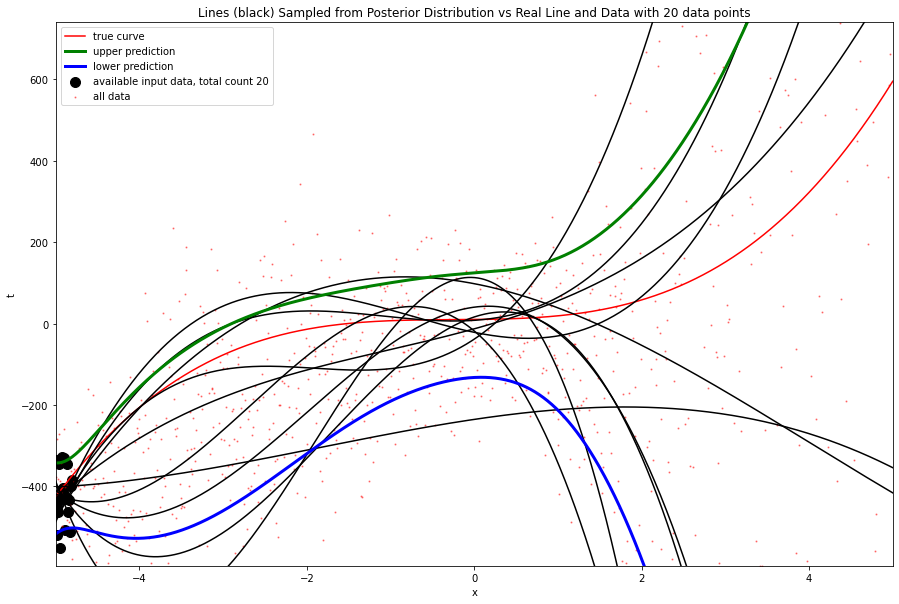

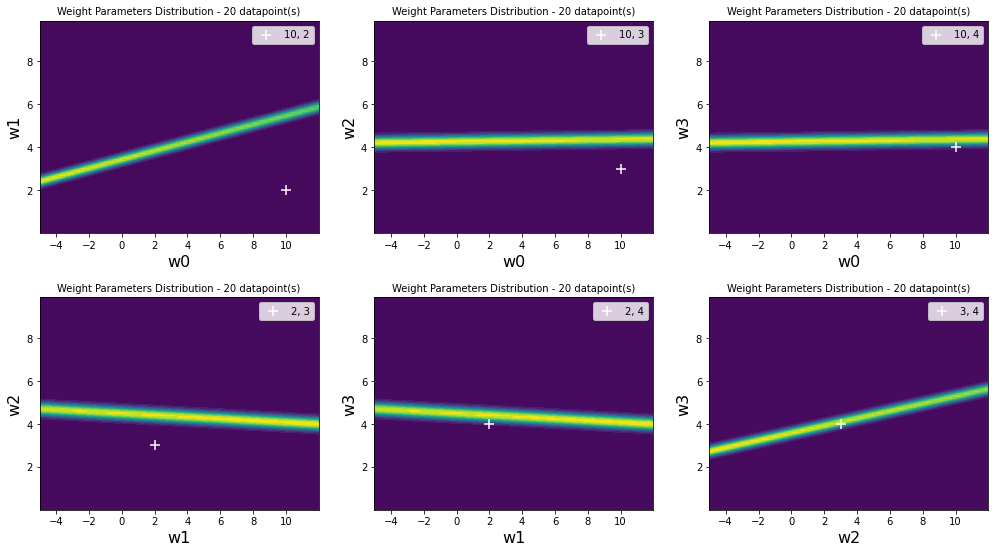

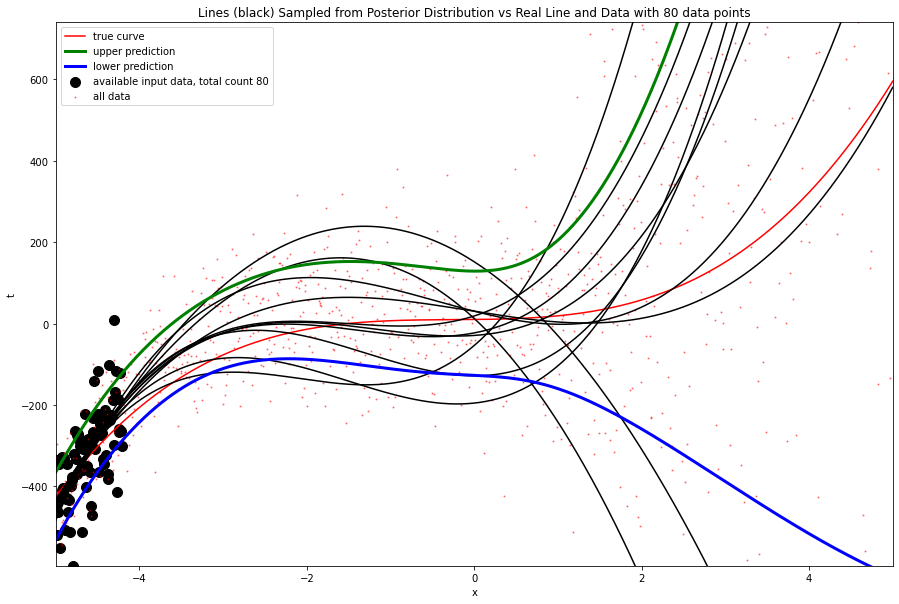

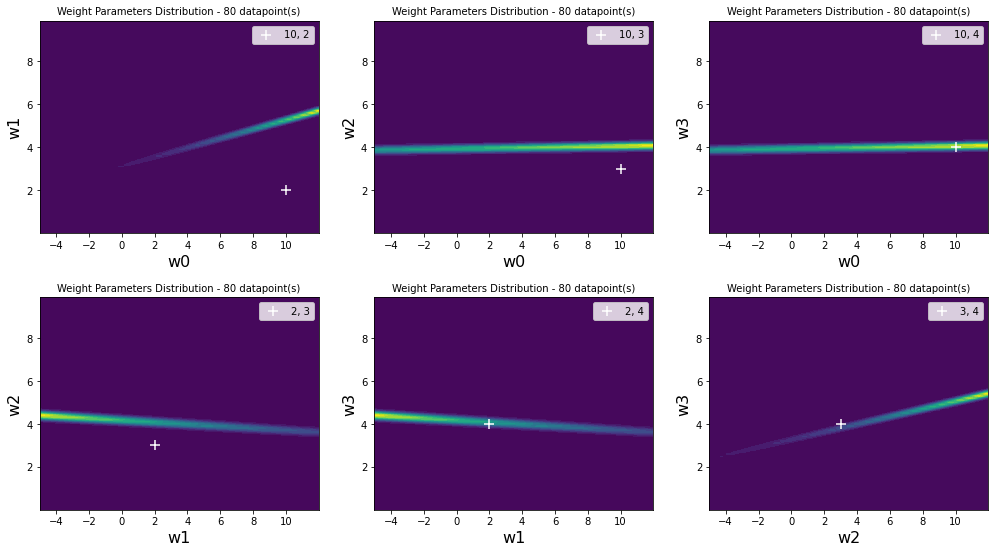

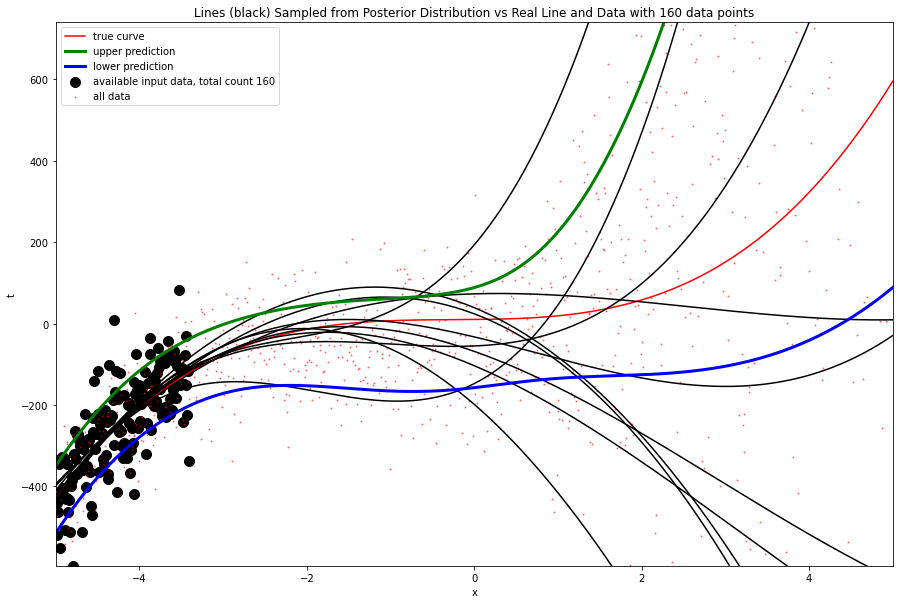

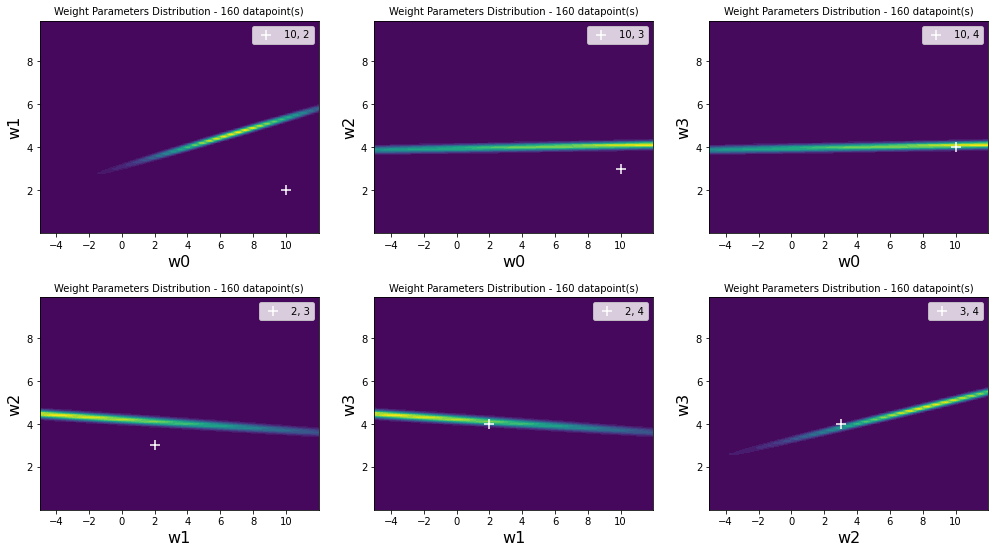

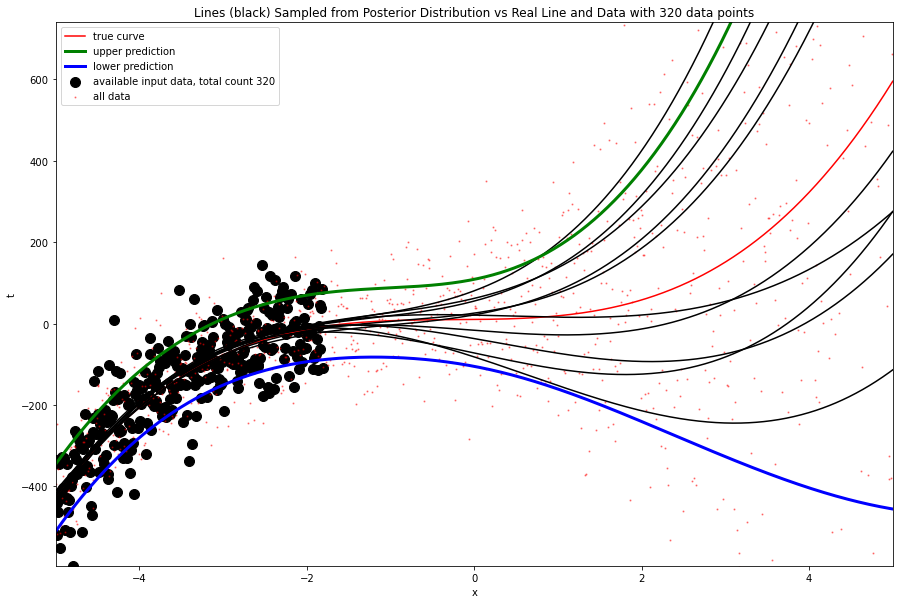

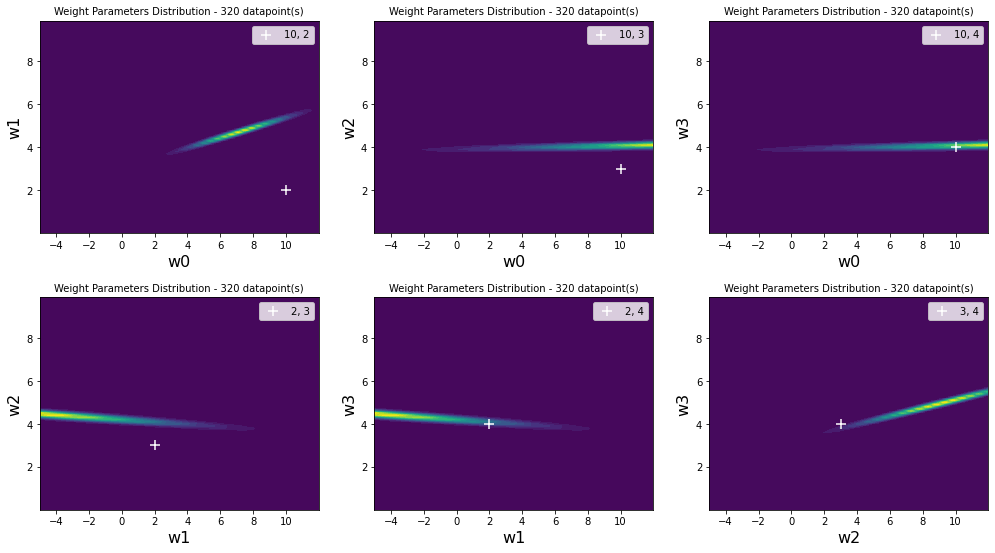

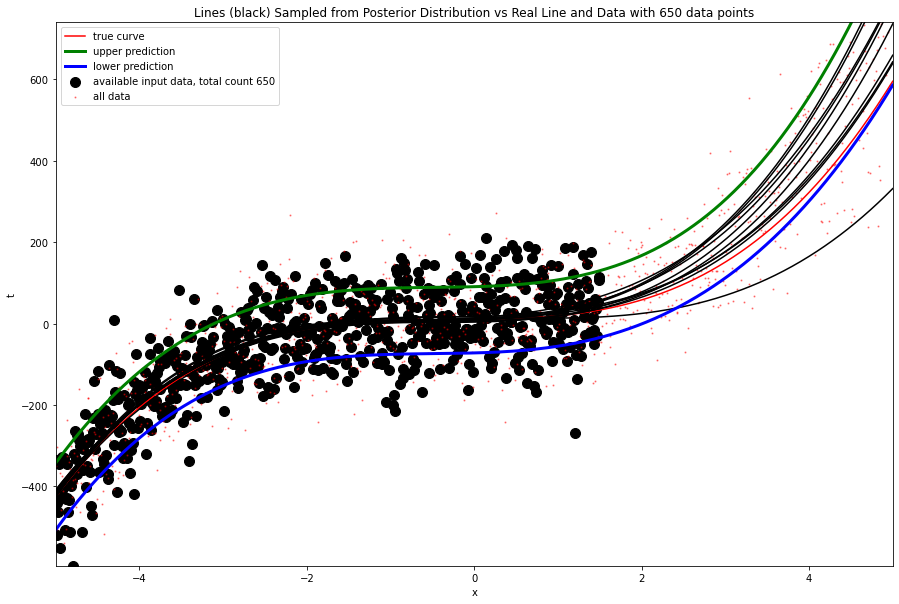

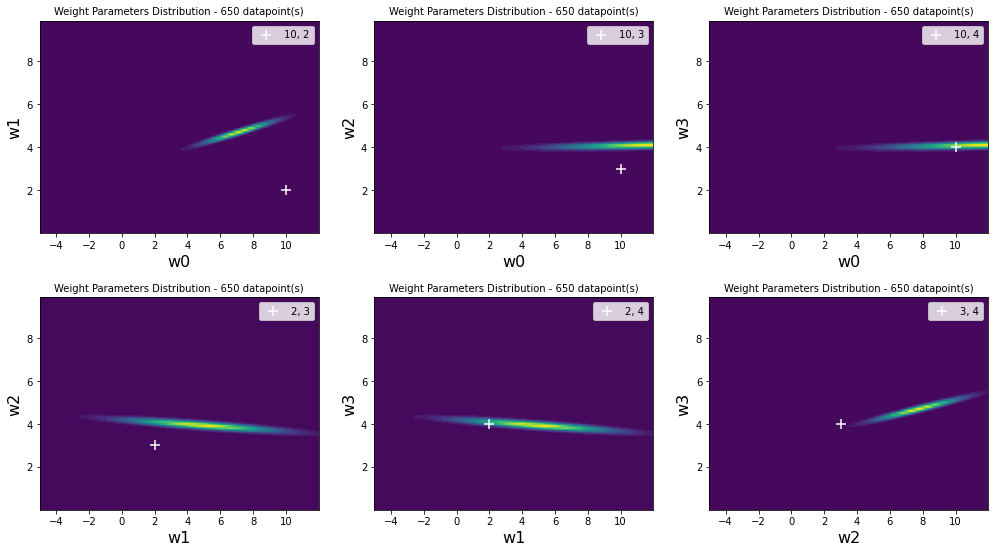

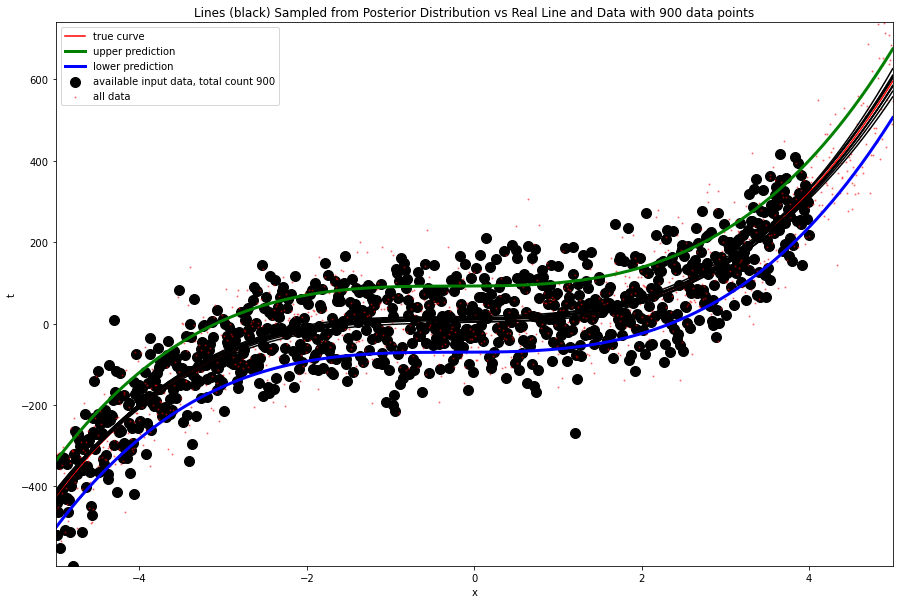

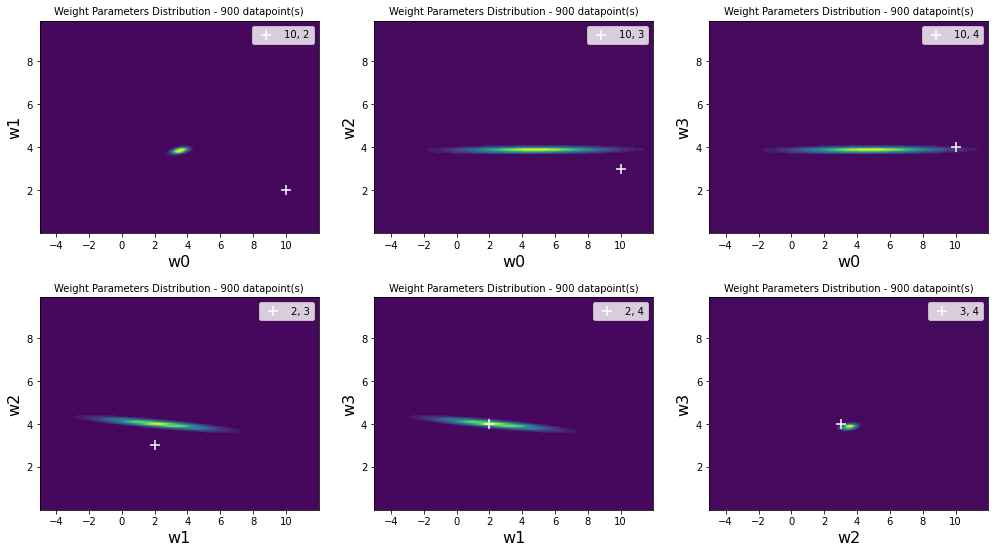

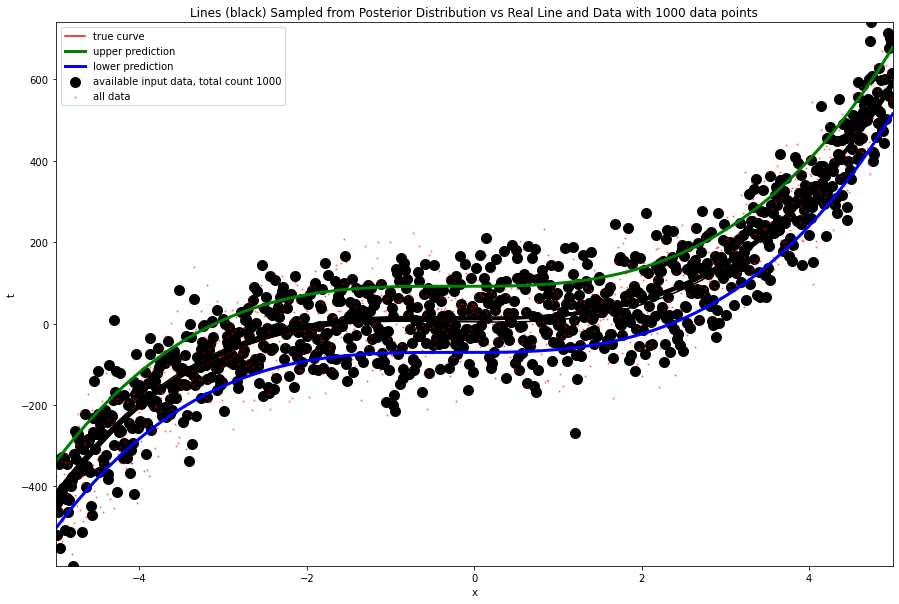

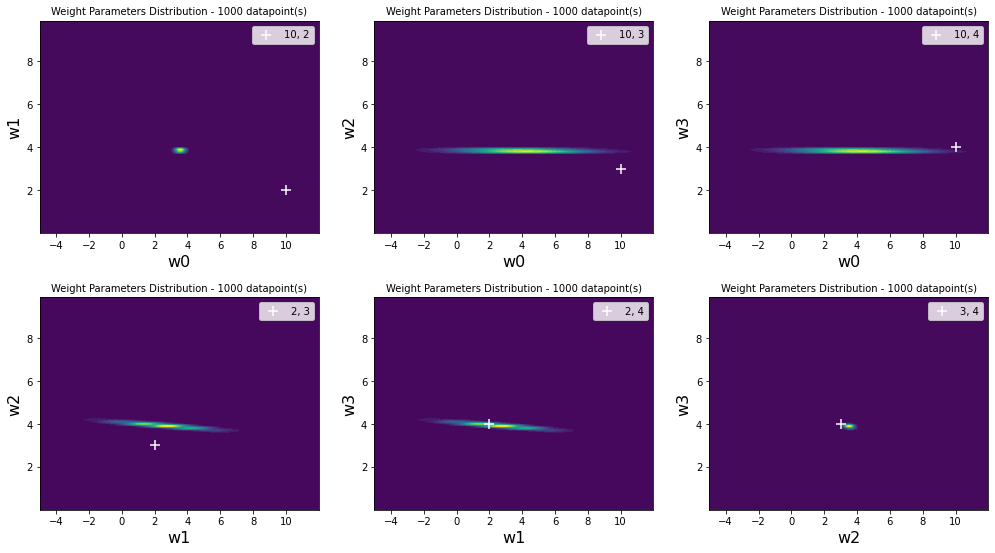

In [11]:
import numpy as np
from numpy.random import normal, uniform
from scipy.stats import multivariate_normal as mv_norm
import matplotlib.pyplot as plt
%matplotlib inline
from LinearBayes import LinearBayes

x_real = x_data 

noise_sigma = np.std(noise)
beta = 1/noise_sigma**2
alpha = 0.0001
v_m0 = np.array([0., 0., 0., 0.])
m_S0 = np.array(
         [[1/alpha,  0,  0,  0],
          [ 0, 1/alpha,  0,  0],
          [ 0,  0, 1/alpha,  0],
          [0,  0, 0,  1/alpha]])

linbayes = LinearBayes(v_m0, m_S0, beta, len(x_real), min(x_real), max(x_real), x_real)

t_real = linbayes.real_function(line_coeff, noise_sigma, x_real)

x, y = np.mgrid[-5.01:12.03:0.1, 0.001:10.001:0.1]

data_length = len(x_real)


for N in [0, 1, 5, 20, 80, 160, 320, 650, 900,  data_length]:

    linbayes.set_posterior(x_real[0:N], t_real[0:N])

    a_x = np.linspace(min(x_real),max(x_real), data_length)

    plt.rcParams["figure.figsize"] = (15,10)
    plt.figure()
    linbayes.make_scatter(x_real[0:N], t_real[0:N], real_parms=line_coeff, samples=10, stdevs=1)
    _ = plt.scatter(a_x, linbayes.generate_data(a_x), c='r', alpha=0.4, s=5, marker='.', label='all data')
    plt.legend()
    plt.ylim(min(t_real),max(t_real))
    plt.xlim(min(x_real),max(x_real))

    plt.rcParams["figure.figsize"] = (17,9)
    plt.figure()
    plt.subplot(2, 3, 1)
    linbayes.make_contour(x, y, which_two = [0,1], real_parms=line_coeff, N=N)
    plt.legend()
    plt.subplot(2, 3, 2)
    linbayes.make_contour(x, y, which_two = [0,2], real_parms=line_coeff, N=N)
    plt.legend()
    plt.subplot(2, 3, 3)
    linbayes.make_contour(x, y, which_two = [0,3], real_parms=line_coeff, N=N)
    plt.legend()
    plt.subplot(2, 3, 4)
    linbayes.make_contour(x, y, which_two = [1,2], real_parms=line_coeff, N=N)
    plt.legend()
    plt.subplot(2, 3, 5)
    linbayes.make_contour(x, y, which_two = [1,3], real_parms=line_coeff, N=N)
    plt.legend()
    plt.subplot(2, 3, 6)
    linbayes.make_contour(x, y, which_two = [2,3], real_parms=line_coeff, N=N)
    plt.legend()
    plt.subplots_adjust(wspace=None, hspace=0.3)
    

# Offline data random chunk

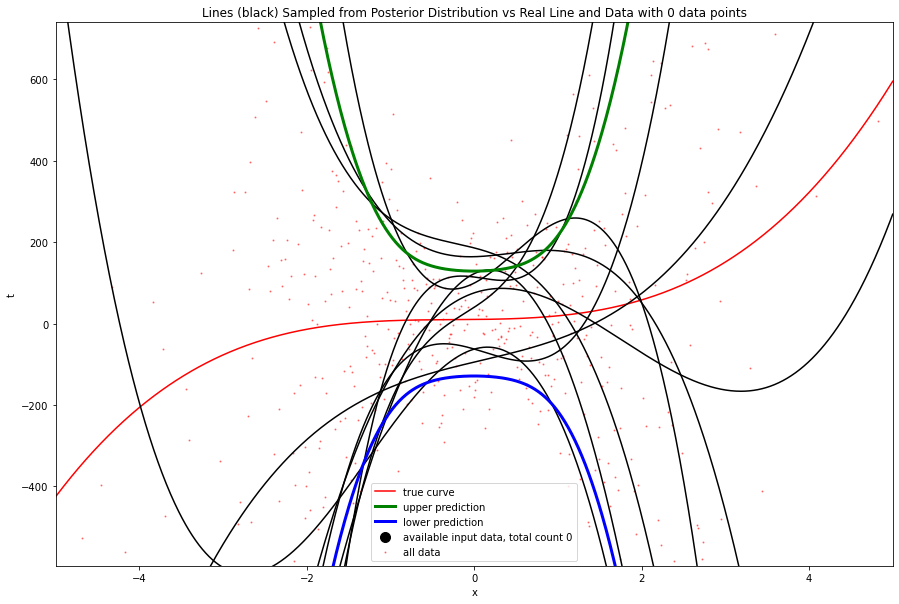

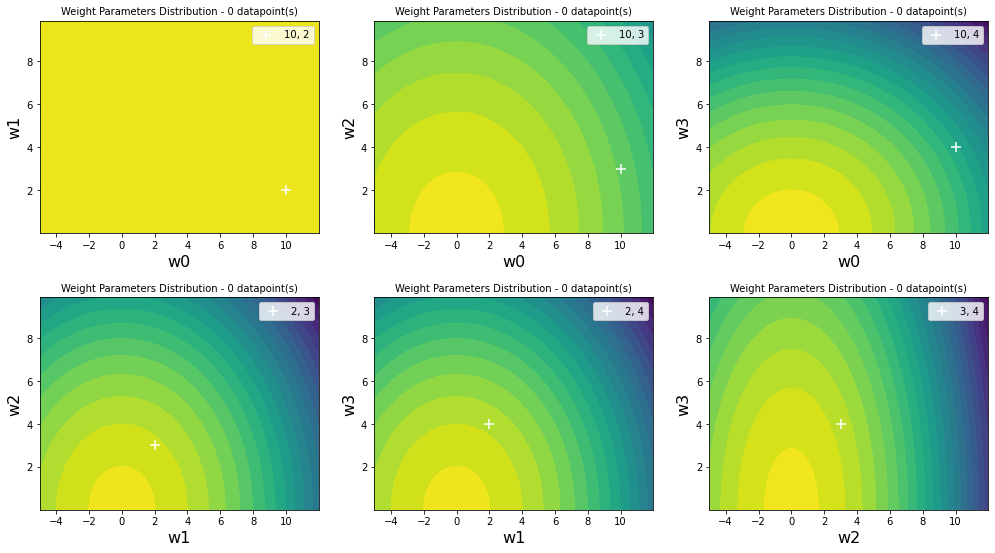

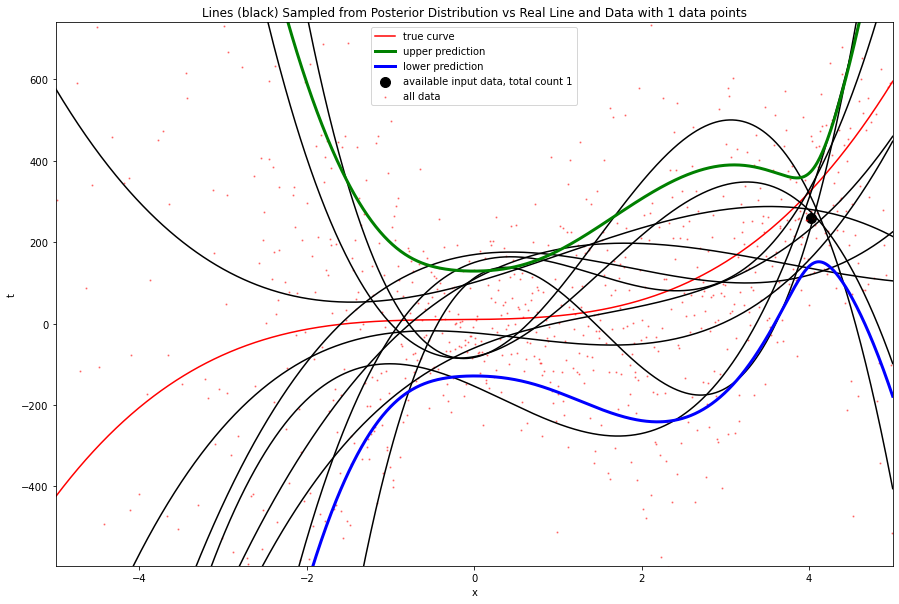

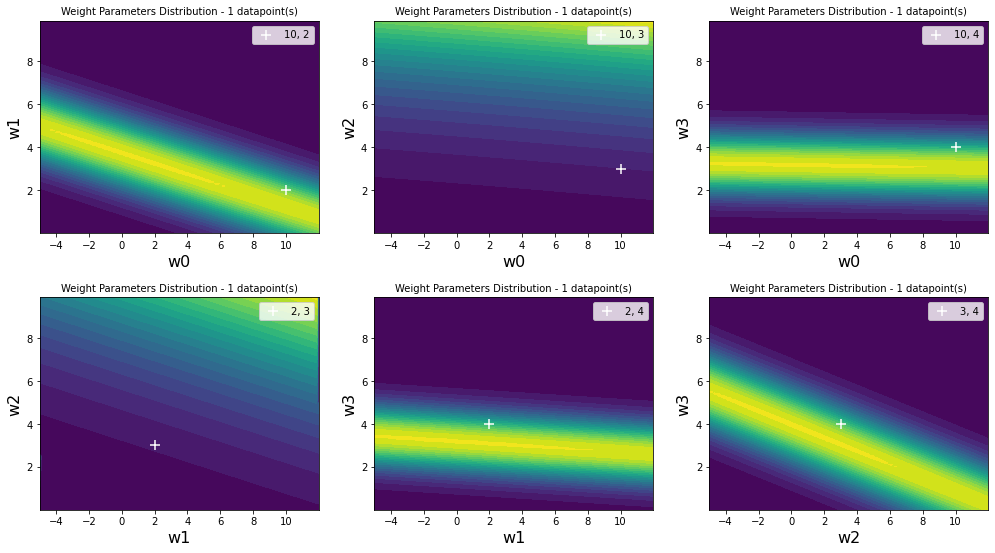

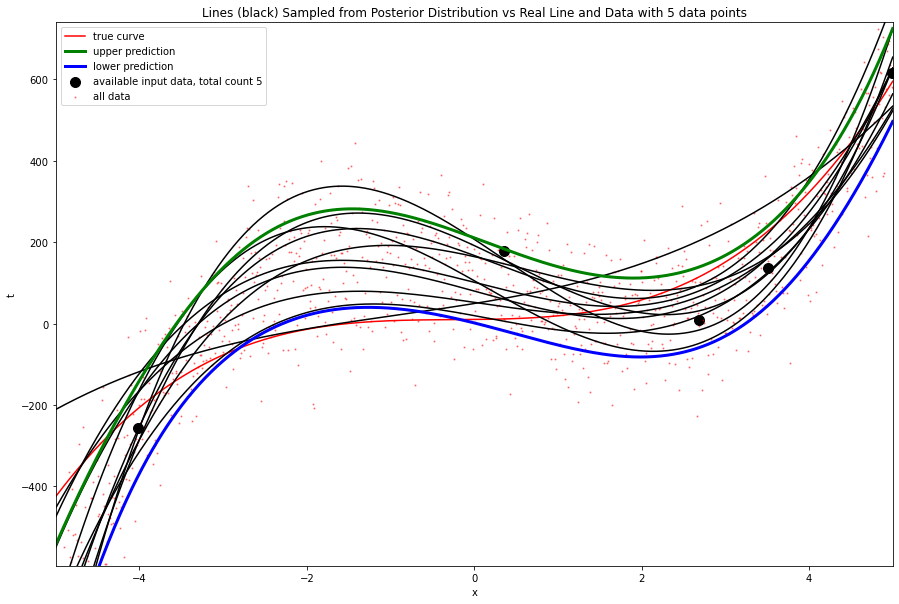

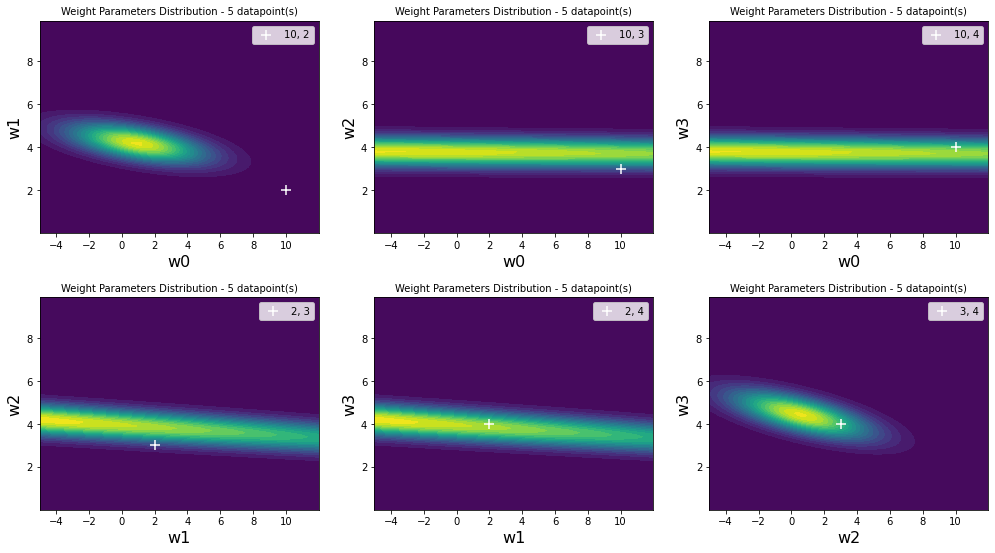

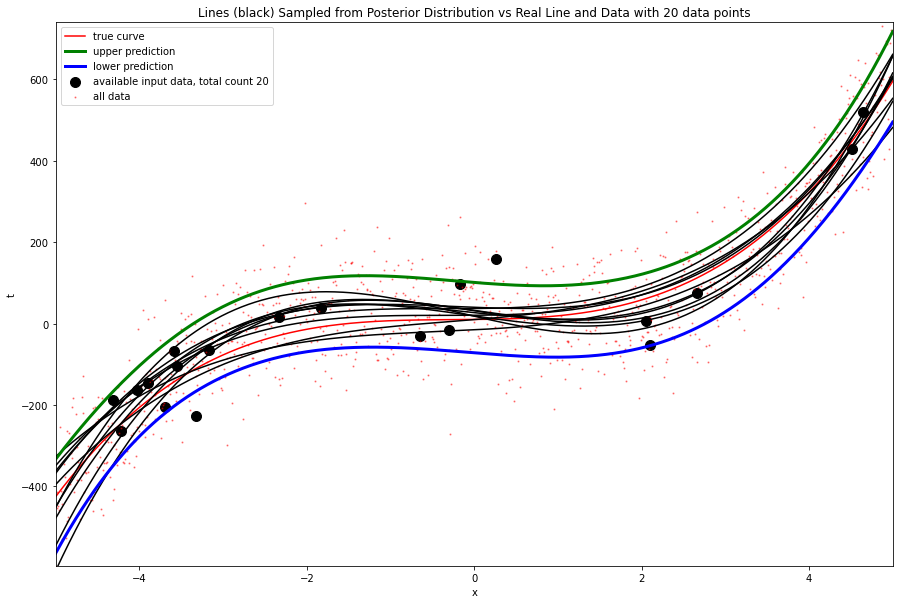

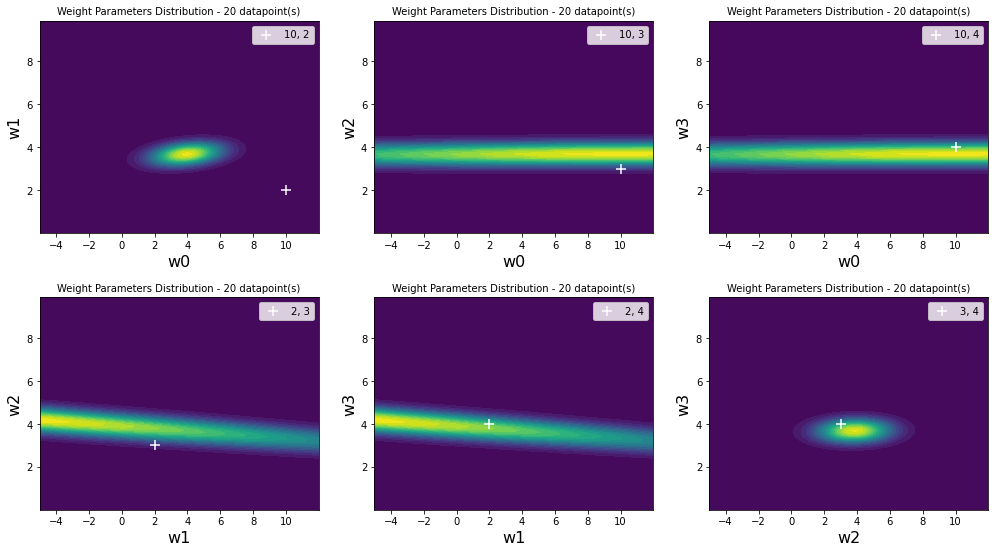

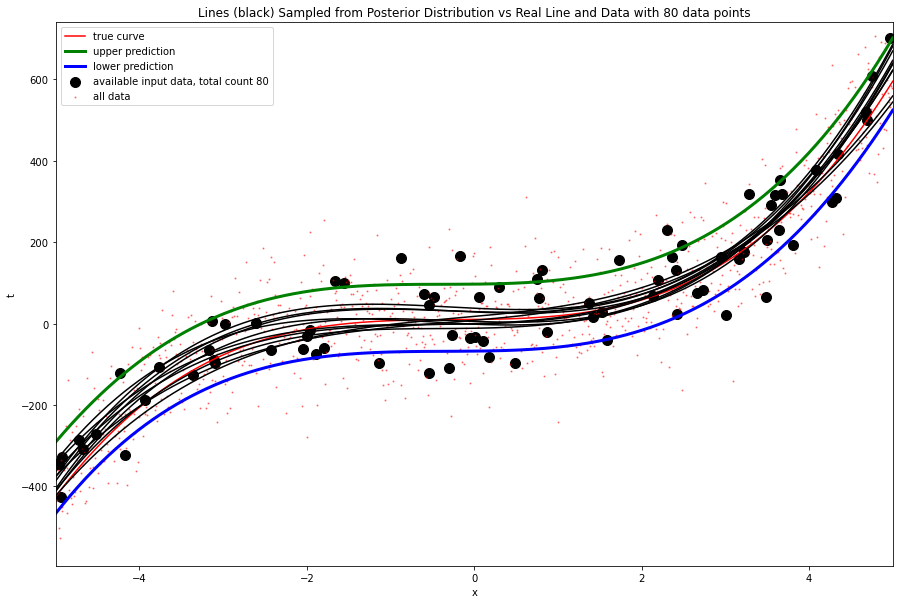

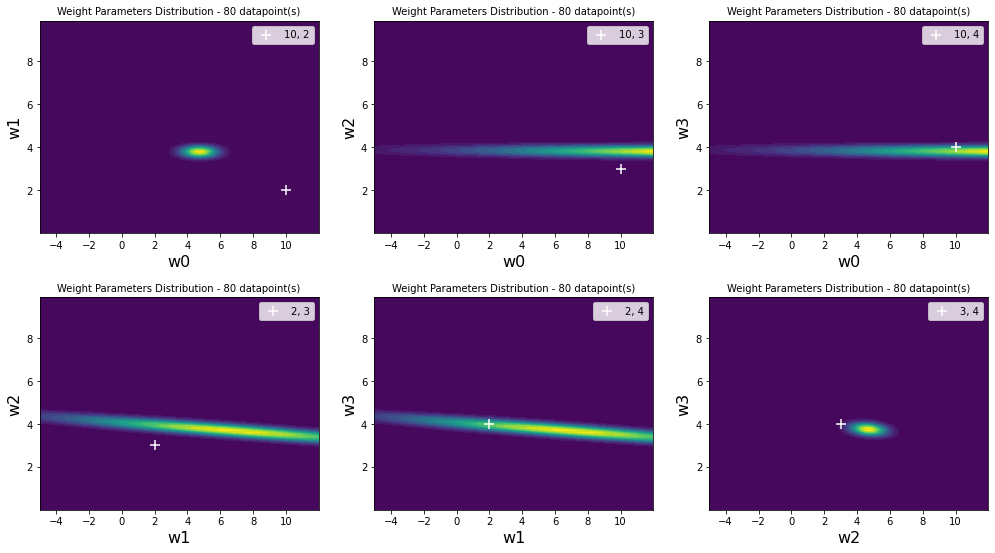

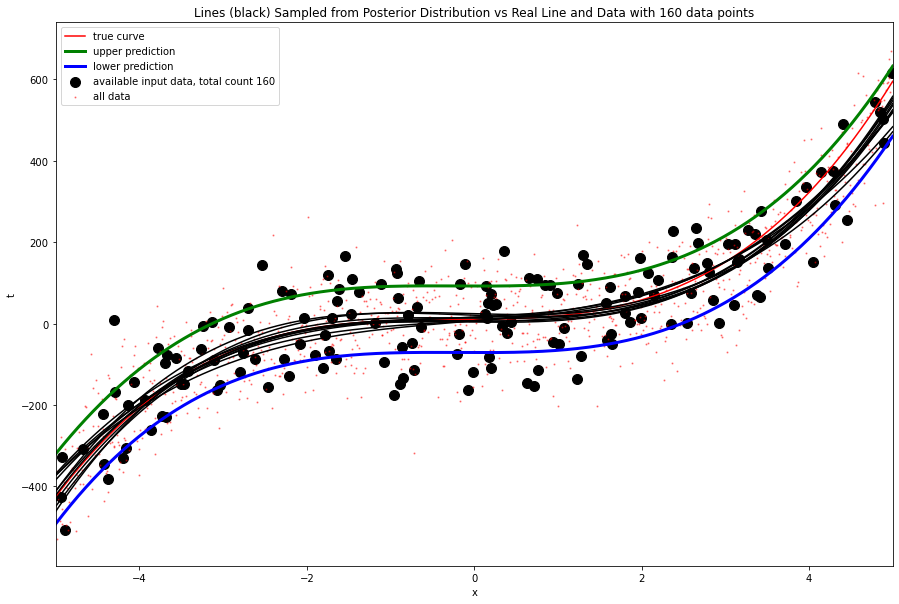

In [ ]:
for N in [0, 1, 5, 20, 80, 160, 320, 650, 900,  data_length]:

    data_index = random.sample(range(data_length), N)
    
    linbayes.set_posterior(x_real[data_index], t_real[data_index])

    a_x = np.linspace(min(x_real),max(x_real), data_length)

    plt.rcParams["figure.figsize"] = (15,10)
    plt.figure()
    linbayes.make_scatter(x_real[data_index], t_real[data_index], real_parms=line_coeff, samples=10, stdevs=1)
    _ = plt.scatter(a_x, linbayes.generate_data(a_x), c='r', alpha=0.4, s=5, marker='.', label='all data')
    plt.legend()
    plt.ylim(min(t_real),max(t_real))
    plt.xlim(min(x_real),max(x_real))

    plt.rcParams["figure.figsize"] = (17,9)
    plt.figure()
    plt.subplot(2, 3, 1)
    linbayes.make_contour(x, y, which_two = [0,1], real_parms=line_coeff, N=N)
    plt.legend()
    plt.subplot(2, 3, 2)
    linbayes.make_contour(x, y, which_two = [0,2], real_parms=line_coeff, N=N)
    plt.legend()
    plt.subplot(2, 3, 3)
    linbayes.make_contour(x, y, which_two = [0,3], real_parms=line_coeff, N=N)
    plt.legend()
    plt.subplot(2, 3, 4)
    linbayes.make_contour(x, y, which_two = [1,2], real_parms=line_coeff, N=N)
    plt.legend()
    plt.subplot(2, 3, 5)
    linbayes.make_contour(x, y, which_two = [1,3], real_parms=line_coeff, N=N)
    plt.legend()
    plt.subplot(2, 3, 6)
    linbayes.make_contour(x, y, which_two = [2,3], real_parms=line_coeff, N=N)
    plt.legend()
    plt.subplots_adjust(wspace=None, hspace=0.3)

This is amazing